# pac code eg with 15k data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
d0 = pd.read_csv('train.csv')
print(d0.head(5))


   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
l = d0['label']
d= d0.drop('label',axis=1)
print(d)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [11]:
labels = l.head(15000)
data = d.head(15000)
print('the shape of sampledata=',data.shape)

the shape of sampledata= (15000, 784)


In [6]:
from sklearn import decomposition
pca = decomposition.PCA()

In [7]:
pca.n_components = 2

pca_data = pca.fit_transform(data)
print('shape  of  pca-reduced.shape ',pca_data.shape)

shape  of  pca-reduced.shape  (15000, 2)


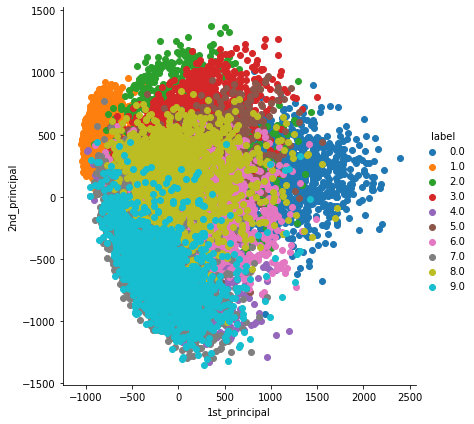

In [9]:
import seaborn as sn
pca_data = np.vstack((pca_data.T,labels)).T
pca_df = pd.DataFrame(data= pca_data,columns=('1st_principal','2nd_principal','label'))
sn.FacetGrid(pca_df, hue= "label",height =6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

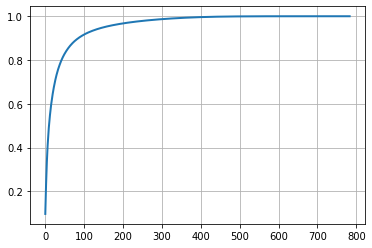

In [10]:
pca.n_components = 784

pca_data = pca.fit_transform(data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explaind = np.cumsum(percentage_var_explained)

#plot the pca specturm
plt.figure(1, figsize=(6,4))
plt.clf()
plt.plot(cum_var_explaind,linewidth = 2)
plt.axis('tight')
plt.grid()
plt.show()

In [9]:
labels_15000 = l.head(15000)
print(labels_15000)

0        1
1        0
2        1
3        4
4        0
        ..
14995    1
14996    4
14997    8
14998    9
14999    6
Name: label, Length: 15000, dtype: int64


# T-SNE eg

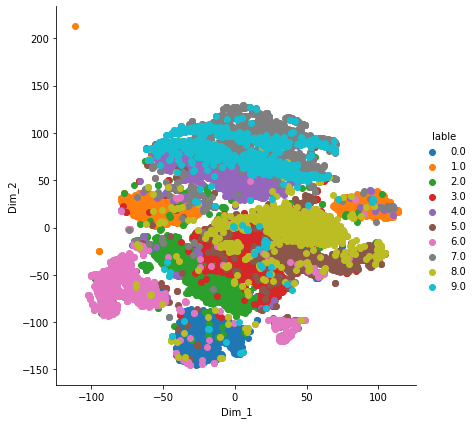

In [30]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn
standardized_data = StandardScaler().fit_transform(data)
data_1000 = standardized_data[0:15000,:]
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 50 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which data7vQMSTYtiV7RPu2CyGEEDEk2LZlzn+BMz16mzPd3C6EEEIkQYJtW4puhGuehOwzAGX+ec2TkhwlhBAiaZKNnIyiGyW4CiGE6DBp2QohhBApJsFWCCGESDEJtkIIIUSKSbAVQgghUqxHg61S6gyl1Eql1Hal1Fal1N3B7YOUUu8qpXYF/xwY3K6UUk8qpXYrpcqUUlN78vqFEEKIZPR0y9YP/JvWeiIwC/iBUuos4H6gRGtdCJQEHwNcBRQG/7sD+G33X7IQQgjRPj0abLXWh7XWG4N/rwO2A/nAfGBhcLeFwLXBv88HntemtcAApVReN1+2EEII0S493bINU0qNBKYA64ChWuvDYAZkYEhwt3zgQMRhFcFtsee6QylVqpQqraqqSuVlCyGEEG3qFcFWKZUFvArco7WubW1Xi206boPWz2itp2utp+fm5nbVZQohhBAd0uPBVinlxAy0f9ZaLw5uPhLqHg7+eTS4vQI4I+LwEcCh7rpWIYQQoiN6OhtZAX8AtmutfxXx1BvArcG/3wosidh+SzAreRZQE+puFkIIIXqrnq6NfD5wM7BFKfVJcNtPgUeARUqp7wL7ga8Gn3sLuBrYDTQCt3Xv5QohhBDt16PBVmu9ButxWIA5Fvtr4AcpvSghhBCii/X4mK0QQgjR10mwFUIIIVJMgq0QQgiRYhJshRBCiBSTYCuEEEKkmARbIYQQIsUk2AohhBApJsFWCCGESDEJtkIIIUSKSbAVQgghUkyCrRBCCJFiEmyFEEKIFJNgK4QQQqSYBFshhBAixSTYCiGEECkmwVYIIYRIMQm2QgghRIpJsBVCCCFSTIKtEEIIkWISbIUQQogUk2ArhBBCpJgEWyGEECLFJNgKIYQQKSbBVgghhEgxCbZCCCFEikmwFUIIIVJMgq0QQgiRYhJshRBCiBSTYCuEEEKkmARbIYQQIsUk2AohhBApJsFWCCGESDEJtkIIIUSKSbAVQgghUkyCrRBCCJFiEmyFEEKIFJNgK4QQQqSYBFshhBAixXo82Cql/qiUOqqU+jRiW7FS6qBS6pPgf1dHPPcTpdRupdRnSqkreuaqhRBCiOT1eLAFFgBXWmx/XGs9OfjfWwBKqbOAm4Czg8c8rZSyd9uVCiGEEB3Q48FWa70KOJ7k7vOBl7XWXq31XmA3MCNlFyeEEEJ0gR4Ptq24UylVFuxmHhjclg8ciNinIrhNCCGE6LV6a7D9LTAGmAwcBh4LblcW++rYDUqpO5RSpUqp0qqqqtRdpRBCCJGEXhlstdZHtNYBrbUBPEtLV3EFcEbEriOAQxbHP6O1nq61np6bm5v6CxZCCCFa0SuDrVIqL+LhdUAoU/kN4CallFspNQooBD7u7usTQggh2sPR0xeglPoLcDGQo5SqAB4ELlZKTcbsIt4H/DOA1nqrUmoRsA3wAz/QWgd64rqFEEKIZCmt44Y8+5Tp06fr0tLSnr4MIYQQ8azycPqkXtmNLIQQQvQlEmyFEEKIFJNgK4QQQqSYBFshhBAixSTYCiGEECkmwVYIIYRIMQm2QgghRIpJsBVCCCFSTIKtEEIIkWISbIUQQogUk2ArhBBCpFiPL0QghOicZcuWsWHDBrTWKKWYNm0a8+bN6+nLEkJEkGArxCls2bJlRC60obUOP5aAK0TvIcFWiB701EtPUbWzKvzYZrdx3fzrKCoqoqysjOXLl9PU1ASAy+XCbrfT1NREdnY2c+bMYcOGDZbnLS0tZfPmzWwbMIR1o8+m3p1OP28T3x+cwb0zJnfLexNCtJAl9oToIaFAqyxWGZs+fTobN27EMIwOn39Xbj4fjJ+C395yT+0I+Pm3/g7m6mF8tGQP9ce9ZA1yc978MYybOazDryVEB502S+xJy1aIbhbq+tVoy0AL0BU3iOtGnx0VaAH8dge/OdbI0uoP2T5nFFploDRMK9vHr0ACrhApItnIQnSjyDHWRIG2q9S70xNu35Y/Gm2zgVJom6J0jJsfbf08pdcjxOlMgq0Q3SjRGGsqZHmbEj+pVNzj9We6UntBQpzGJNgK0Y26M0diZvlWHAF/1LbYx5G0grKyslRflhCnJRmzFaIbKaW6LeAWVh0ECGcjZ3mbmFm+lRUTpqFjW7aA0prXX38dgKKiIiB+ahHAqFGjuPXWW1N89UL0LZKNLEQ3WrhwIXv37k356zidTq655hqKiop45ge3cSinINx1vGrMJLblj47uStaasw6WM3vPFsC8KRg8eDDV1dWW55eAK7qIZCMLIbpWWVkZn39unYQ0atSoTgXh66+/PtwajVV3rBpyCsKPQwF1+/BRaKVQWjPx0N7wdjC7uxMFWqBbbhiE6EukZStECjywvISXSY/qvg1168ZyOp04HI5w8YqupJQiraGGpvR+8UlRndRagBciSdKyFUJ0zAPLS1jgzA7Pca1Py+CD8VMALAOuz+fD5/Ol5Fq01jRl9IcU3FTHju8mK7YyVsj06dOlxKTosyTYCtHFXibdspjEutFnJ2zddsSu3Hw+HFuEx2lO2XH7mrlgd5n1a3RxqxbAMAyWL1+edLBNFGRDSktLw8lYEnhFXyPBVogu1loxCSu7cvPjMoatAmbkfmm+ZjwOJ9haZu95XW5WTJgKWLegUyHZru+ysjKWLl2adAteFlMQfY0EWyG6WJa3ifq0DMvtsWLrFyfqct6Vm8+KCVPRNjsAHpfb8rW1zW7Zgg4tvReZv9Cd05BKSkosA+2qMZMSJmqVlpaya9cuampqwgsvyBixOFVJsBWnpdgpOF05leUmmlgQcMUtADCzfGvcvonqF8cGzDVji8KBti1WLejQGreRLcWumIaUnm6+VllZGSUlJQkDY01NTdyxsVOQtFJsyx/NyfQsajP7xbX0lyxZArR/jFiI3kCCrTjtWAWZvXv3snDhwk4F3FABCAdwUZJdw8l2OXudyZdSjGxBt7aYfFdM32lqamLhwoVUVFSEW641NTUsXboUaAmM2dnZcQF3+/BRlmUjDw0aEt4e29JfvHhx1HmFOFVIsBWnnURBpjPBJ7bSUmHVwaTGTdvT5ZwMZQSiWtD9+/dn15ARFH3wCUcDus1pSB1h9XPz+Xy89tprLF68mOzsbAoLC+MqUVlVsTLfRPT22JZ+R7OghehJEmzFaSOUDdsey5YtY8OGDWit41qJj3/8Cb890UStM40s+yBm5ua3K4jZbLaku5zTfM3W47QRY65W2cilriw+qPWb51eqzWlIXSk0HlxTU8PmzZtxu914vd7w80rrxAE3RmRL3zAMFi9eHG7l5uTkcOedd3bhlQvR9STYitNCe7NhIb61qrWmtLSUsrIytmbnmolNLjMIdCSIGYaBY91qLs07k38UjLfscg4F+ElfKOSeHQfwRQRXmxHgkh0bW329ZMeEU83q5z7x0F7LspFW05Raa+lXV1dTXFwsQVf0ahJsRZ8RW7XpJpp4+Ko5QOJs2FiLn3qKw5/t45F5N+LLyIfZ+YDZPattdtJ8zfhsNgLBlmKkjgax0Yc/Z/Rh6zKOWmuOHTvGrcMGAXDfph1JVaUKae80pO6ilOLXXyjkz+4BvHDoOIbWKK3JO1HF0QGDk0oui1VdXc1TTz0lAVf0ShJsRZ9gVbVpQcAFy0t4+Ko5ltmwED13Neys8+MCqQ6eN9GUm5B6dzoLzrsqrtAExK++U1h1MKk5tnv37uXnP/8511xzDd9a907yPxS6fky4q2itKSkp4dF77+XR8S11m5966ik+OrI/qeQyK63VcxaiJ0ltZNEnjF3+D+ug4mlkcX4WJSUllLqywl/iUeOFXVldyaobNPQ7FttdGhKx3RHwc9FnmyyDi9PpbHdZx9h5vG29RncrLi623P7UU091OHAmOqfolU6b2sgSbEWfMGzFJuugqTVuX3PL1JkUlC3salmexoQtWJvNhmEY7TpfshWqekpr05PaKvFoRYLtKaX3/0J2EelGFqeUyAzg/j4PNxqNDN5RRtaEmZYtWzDLGJ5KWhtPNQyj3ZWfkp2G1FNCiWehm+JQ8C0oKOC1115r13vNyclJ1WUK0SnSshWnjMc//oTHQtNYQmI/v6dAy7Ut7mYvt33UvilKfVF7W/GSjXxKOvV/YZMkLVtxyvjtiabwVJuwPhBcYzU7nK0+39u7hTuqI+9LKcWDDz7YTVcoRMf1eLBVSv0RmAcc1VqfE9w2CPgrMBLYB9yotT6hlFLAE8DVQCPwba31xp64btG97v37amqdWT19Gd1CK8WLMy+3DDa7cvNZOWEqRrBOcn1aBiUTp3O4/6BwAf9TLRhHLRWYoExjIn29Z070HT0ebIEFwFPA8xHb7gdKtNaPKKXuDz6+D7gKKAz+NxP4bfBP0YddsaSEzf0G9clWrKVgpaeSidP5cGwRo49WUD5kRHg6kVU94W35o9mWPxpHwI9hs0UF4+6qGNURVtnSIcnMW1any2dCnPJ6PNhqrVcppUbGbJ4PXBz8+0LgfcxgOx94Xpu3s2uVUgOUUnla68Pdc7Ui1V6tPM4Duw5ywh8AIA0Dz+kUaCMphcfljq+ylGBfAL9FF3RnKkalupVsVeEqUlvFN7TWFBcXk56ezlVXXQXQ6upDou9RStVrrRN2ewXjy7JQz2nMc+8DP9Japzyxp8eDbQJDQwFUa31YKTUkuD0fOBCxX0VwW1SwVUrdAdwBUFBQgDg1vFp5PK4koQdb16ZQJCgH2OZzyZ4bcx6r36LCVId1wXk6UjEq2bV2Q/t2JCi3dV3JFt9oamoK10oOqampkUULRK/RW4NtIlbfOnGDNlrrZ4BnwMxGTvVFia7xi/LDUYG20yyC5/gMN1UNjRxXdty+ZhTgcbrI8jbRv6Euanm3pM4fZA8EuHjnJgqPHgQFv5s9v+veRxdoK2hZBctk6yonE5QTBeNEFa4gvkxjRwK6YRgsXbpUgu1pQCmVBSwBBgJO4AGt9ZLg0w6l1EJgCrATuEVr3Rhz/OXAzwA3sAe4TWtd31XX11uD7ZFQ97BSKg84GtxeAZwRsd8I4FC3X51IiYPe9lVHapVhUFB/gor+gzEAO/Ct4YOiSgMC/OxnP4tKsold0Lwtdy9fhzejsuU2UAHa1iVvoas4An4Kqg/z3PlzW+2yjU1O8idYrD62NdpWUG4tGM8s3xo/ZhssRBK5gpHVOWITwxLZNmAIhW9/RJ2rZW52v7LScKEMm82G1tpyZSdxSvEA12mta5VSOZhDjW8EnxsPfFdr/WEwKff7wC9DBwb3fwC4TGvdoJS6D/gh8FBXXVxvDbZvALcCjwT/XBKx/U6l1MuYiVE1Ml7bd+S7nVQkE3Ctyh9GsAH/d/ZIbhg2tdXTlJWVxWWzzt6zhbza46yeOI1mFRE0Y1vJWlNwtCE60IYogxHHq6kYnNv2e0ml4Hvz2+ztuoEAM1jGzWEOyvI2WdeUjlHvTmdXbj4lE6aBLfoGJBSMQ5Wy2mqxWo7tBhPD8mqPW7Zwd+Xms2ZskVk9LPjea13pLAg4uShrEIVN5jGRc3lDBTb27dvHsWPHJACfWhTwP0qp2YCBOcQ4NPjcAa31h8G/vwjcRUSwBWYBZwEfBpPuXMBHXXlxPR5slVJ/wUyGylFKVQAPYgbZRUqp7wL7ga8Gd38Lc9rPbsypP7d1+wWLlPmmw8cvmwwCMV/MCk2a10OTK43sxjruzLLxrxdfAJjjvL8oP8xBr498t5OfjM7jhuAKObF+s6ac/6s9yck0xQCP5ryDWzkz4vnIAJJhs9GcoH4xWjOy0sfV21ZjJPgNmrflQ569+FoCHflBdJXOjvUqZXmTUe9Op2Ti9KTO39p+oUCdTIWrhEFdqahu7VVjJrF9+KhW614nkzAWWZc5tsJVyPTp0yUA9y7fBHKBaVprn1JqH5AWfC72zjH2sQLe1Vp/PVUX1+PBtpU3N8diXw38ILVXJLpTZLDM8jQyNDRuGpSmFF8bPpiSY3Uc9PrwuNz80gs/X7EJe6CJdJebBsPOEKORa489y4CmVdy86Z8ocV+BoWzh7uOCKj+PNNXgSzcD+cl0xbujJnJRs8eyq7OxlbFjm9acfbAKw+5NuA/AkxMLuGf7frqwc7z7hYJVG70JrR7bBVob2w0F4vYMAXR0icHYceO1wVWlRK+QjVmvwaeUugSi7qULlFLnaa0/Ar4OrIk5di3wG6XUWK31bqVUBjBCa72zqy5OyjWKbhcKsBVenznEGflkTEtKGQYOuz2pxCmX9lDIdrYy2XrlnVYWKlC0vXxepLRmL7eteRdt91vvoKH4Z8VRNxNuXzNeux0dMRaqjABuv79lDm2MlK1O1BtoHf53aSvhaVdufsJWsjKMdv+MlGFw6Y4N7ZrGlGgFpW/7aiTgdlynP9ShqT/BcdelmMlRnwDnY9ZmALNXdBXwRWAXcLPWujFy6o9S6lLgUcwEKTATrN6gi0iwFd3q1crj/HD7flpvE3ZCR6fvtPc4rcnyNFGfZj3OaPO7ufbGuXEr1nRoioyGF2ddnrBl11ckWvpvV24+74+bTMBqOlVnpmsFv/vSfM2c38qawyEvzrT+N8jyNPLrwHHpUu6YPnYHmZgEW5Fy21evZPXLz1N3rJpnvvljarL69/QldZ7FWKbb18xVR9/jmsF/xe1uwOvNZN/eyVRVje70y+3KzWfFhKlRreK+KHJ5wV25+bw/fqo5hp/iVr0yDEBH/Xxjg//vZs9P2DvyL6uWyNJ+HXPaBNseH7MVfdv21St555mnWH7uZWw+ewZa9a5pMR1mUTLR63Lzev7VvM8MahmEkWbDNtFgytAyzv308069XOgL3yqzNylaYzMCZhnHXtwdHRpLNW8upqE78l47wOp1YhOpEo0bh+YwL1u2TFq3IiEJtiKlVr/8PMvPvYxPzpnVq7/ku4xSnNQ54fdqYGfDoMlsmD2ZNF8zGvAGi2i0t/RhaN92t3C15qyD5Vyy/j1euOxGavsNbM876lahwLVu9NndFmhbE5lIZTUnOLLwxoYNGyTYioR6/tMs+rS6Y9VsPnvG6RFoQyxavaE6x16XO7zQwIoJU9mVm9+uUxdWHeTSHRtxN3tbEoxC/7Vi9p4tBAYO4byyf7S5b0+xGYFw4OpotnAq7MrND4+1+212s8tZa7I8jVHdzH19SE50jrRsRae8vukg//v3zzh0sonhA9L58RXjCeSlhzNw+3/rx32n67iLaZudkonTeX/cZC7e+UnSrVyreamtZeuGKcWoZi+Tdn7ClnEWGds9zOn3t9ll2yGhm5GOtJSVMrvugzdMYC6B6NIebrItJI8mqhgd3LV3/TxF7yLfgqLDXt90kLt2rGfPjGyaLh/OnhnZ/GDfNu7ZVk6F14cGajL7QDJUKilFwOGkZMK0drdyIxVWHcQesJ6G5PY1tzyw2bjg0H5+c9aZuLUR1TJWOoBFqfFu442Y/jSzfGswaSkJbbUolSLN78Pu93WsVW+RoNWs0njO+S88PfFmKseYKy1Nmzat/ecWpw3JRhYdNmbRGzTknBGXlZsoY7O3taR6Ha07tYydVcayMgJMPLSP/Tl5UVNaLs9ysXfv3qjjz52xmO+n/Q6v6pkpRpGZyGC+n9WF02h2JJhDG/zuujV/MDOys8y5257mVjOGoypMddHn0aW9XHeskie+2rsWnzhF9KovBaXUlcATmOXUn9NaPxLzvBtz7fVpwDHga1rrfcmcW7qRRYc15ORbj09aia1E1Nr+7QnMVjeLp2pQD47ldnSx99D+kXNFC6oPszPvzPhFAD7bRGHM8W53A9/l9zynv0ezSqMzMhQ0tuM+PnaFH4Dx1ZXM/qwWf7PBlgIXf5+SQZPbDJIDHXYeLsyPKs15w7BBjPv7R9S64sd7s7xNEAgwe3cZsz/byK5hBaycON3Mzu6kZuVmef8hPNHpM4mepJSyA78BvoS56M16pdQbWuttEbt9FzihtR6rlLoJswjG15I5vwRb0QkdGwOLYhVYrWryxtIapUEryG40uKSsiUn7m/n5DQMwHKdosA3y2x18MG5yh1q3keO5icoXJqoN7PVmcn6aWcXuef0d6unfoRsXBTQZBqBQaM6w2Tig4yuFKSOAttkTtuavvW4+aU1D+GjJHibt93JeveK8+WMYN3NYwte+0WhkQcAZlzF8/oaV9Nu5yXzscvPAFZdxfeGocG6BSxt46Xhrt9bZuZsT0T4j73/zG8D/AAWY9fN/uu+RuS918rQzgN1a63KA4II384HIYDsfKA7+/RXgKaWU0kl0EUuwFZ0QWrwuRntaph2t9gRom3lsTaadN8/NBODL6xtZOiOTgP3UD7irxkxqc/m4RNqqE1zvTud3s+ejtCbvRBW1mf34nXs+g6nma7zI7/kOf+K7rNBXYIRuqiLPZRhRSUNhWptBNZgUp1HsNzSTHYpqh5MKT3ObXeWhVXZCa9DurCpl34YNVGnNvrffY1qV9Qo8ZWVluNZ/yEWD8+IqQU05foiAUvQbnMOFN93CxAsvYSJEtYzv+2w/Lx46bi4eEVFdyhOxapDoecFA+ywQGu84E3h25P1v0smAmw8ciHhcgbm6nOU+Wmu/UqoGGAxU0wYJtqLDLs5q4v36zLgx2+H6cw5xZqe+oNK9Gr8DfI7oc1t+wWPu9/qsTLIbDSbv8bI730lNhkWQOFUoxfbho9oVbJNZ8Sby/GBm1h4aNCT8+Bi5PM09PK3vRikDHXkzFQxAoQB2uP8gM6BHssr6VYrNfoNLdv6cqyvGYmujRyS0ys7mzZsZMWJE1Nhy6DkgLuCWlJRgGIZltrY+Yyz/9qvftPq6j44vCK93HFkNqr1rHIuU+x9aAm1IRnB7Z4Kt1T+w1epAbe1jSYKt6LCXZ1zATR+v4f36dMwuZYNZJ71cv30bu6e+yx/ctxCg/a0Chz/AFZvM4gYri9KTD5pKUZNpp2y0jbnrG5i0v5n/vrH3FnBoi1aKl6degt/pbLWWcqfLGsYdY97Q6NigqFRUElNh1UHyao9HtSITzY/VKMZUjGkz0Eby+XxxSVwhVgUkampqgOibDqU1Ew/tbXcPQXZ2dvh8oTWOu7OilWhVQTu3J6sCOCPi8QjgUIJ9KpRSDsyVho4nc3L55IhOeXnGBVReOo3KS6dQeek0Ln/PQ92BWQxdcgM/XdRAzslA8tMttKZ/vYd5683x10n7m7lrWQ3ZjUa7gojPoVhZZH7pZzcmMX0kiaIQPUIpTmb1N+ebBpOnVsYUwtiVm8/KCVMJ2LunDGNkMA2tghN5fYkorbFbDTl0kNaa4uJiFi5cCJhdyNDSCtXBGw9ts7EtfzQlYybz+qbkx8DnzJmD0+kMPzaLiWxI/DnpjZ+fvmt/O7cnaz1QqJQapZRyATcBsav+vAHcGvz7V4AVyYzXggRb0cV0TGz73ju1XLu2gXSP0eoXktOvuXZtA3e/2cik/c1Rz4Vbtu0QOuaSsibsgbZ/F+ZsL+2dX5gxAdQIFsIIBdx1o8/ukozaZIXKKYZeOzIRCWhJbosUbF2mwt69e1m4cCElJSXsys237u5Vit3DC/j9h//E5a9czpvlb7Z53qKiIq655hqys7MBs6V734UzGX78qOX7O+dIZ7/nRTv8FGiM2dYY3N5hWms/cCfwd2A7sEhrvVUp9ZBS6svB3f4ADFZK7QZ+CNyf7PmlG1l0KWWLD7iT9jezsiidJqtKUlpHZRNbyW40qMlsX0AJtWhD54ycNhIrHEBOlbnASlEycTqH+w/q1rKGoek5kcsEJrzE4BqzSmvO2V/FFz8vI1VTKvfu3RtuZSf699NKMb16OqWUUvyPYgDmjp7b6nmLiorCSVohC4B7Nu+K66b+1RdiJ1KJVNn3yNyXRt7/JnR9NjJa67cw176N3PZfEX/3AF/tyLkl2Iouc7hyCeOv/QXaXoW/cRBHy66j7sAsoPXW6V3LahI+99aUDGrTba0HwpjnnH7NJWUtLbBQl/SWAhdvnpsZlXQVCiDrRp/dsXJ+PUWp+OSkVIhJigLiivHHyvI2meO6GnKPzAacVA9xom3WFa66wvqx57R6TaFu7HNOnMPb/d7miY1PtBlsrRQVFfFrzGSsmpoasrOzmTNnTlxQFqkVDKydDq7dSYKt6BL/t/EZfn9yJNWO32LDwMhUDD7vGF/K+ZzCTWcmbJ22Nqb6wuws9g1zxmU72wMalx+zpQpxzxeVey1byaFtoaSrfk3NzNhXRmHVQbOucDJ6U+s3slBIqq4p2C0cCrRtJQmpiMUEItmaMwi4a1NWL6jOopBFWEQ3dkbAHFeubKjs8GtZtXiFaIsEW9FhD699mL/t/BtDsqfzWb/bw1WHjGAizDFyWVzYn6uP+bikrCmuVRnbAo20pcAVH2gBlMKwwY+WnOCX8wfQlBafMbutwMXVm2KHdEzRAdfF+pFfQBnO5JOZNxcAACAASURBVAvf6+D/ekvAhdRfi1KUTJyG0jqJbFzF4f6Dwt3M2Y0GF2yv5Iz61AVagHy3kwqvL/6J4PKCoWxkvzJb18MyExfGECIVTqF+M9GbPLz2Yf762V8xtEFFv68lLO/XrNysLEpn0v5m5q5vILvBzE7ObgiEp+dYWVmU3sr4m/lnuGUbI9F2INyVXJNpZu/WZrj4YMIXGL/fhq2tRCqtsRv0rkDbXZQtqTV0Q9m/oQzlmkw7f58ylF1DWjKoc3PLOXfGYi648AXOnbGY3NzyTl1aVlYWPxmdhyumk8QR8DNne2nUtB+7tpNmT+PuqXd36jWFaC9p2YoO+dvOv4X/foKcVvcNjdeGxk6T0doYr+pE0vDKovToQhmYU4W2Fbj48scNLYlUYLZiQz3VGs484jNb212hN3VHd7UE5SEBSseOp8b5ZXKo5kb+zPlpaygctxaAqqqOjUHX19dTeLSCy/dv5f1ho1qdk6xQFH+xuEPjtUJ0hgRb0SFGRMrxQKo5wZCE+2Y3GmQNcuNt8OPzBpI6f8IMZK2ZutsLmFWmmtLiA1a6N3E0ThTEQwH2R0tOJjz2l/MHtB0gQ9NC2qrrbATQrST09DX17vSoxKpqhvCc/h4A59vXMHLUJ3HBNjLrua0Sj4sXL2YE8K3Pd7V6HTZlk0AresTp89suupRN2cIB96zKV1k/7DbLruTQuOx588fy7p9a6nlvKXCFE5Wspv5YjfGiNSMrfeHx2Cs2WdRB1pomt+LJedmW04kSBnGlwt3dVrYUuBJ3TwcDrNOncRjBwJ2g5eoI+LnoM7MgfpuLvbfyWqFrPmVoHZct3KzSeFrfw9PcA2kax/kB/HZH66sV0f7VkCIlWnO2rKxMMowFSqk/AvOAo1rrcyyeV5hL8F2NObf321rrjcmcW8ZsRYd8dZw51WzUwQxmLD3A/E9fZrBRBVpj0y3jspdu2c2w5hJeWv47qoauorbfzrhx09BCAlsKWhYPtxrjvXZtAzevqo/a55qPW/aJrJ1sdU4wg3ii4hWtdV23Noac7jULcmBTZsJWqH5zaFF2wyzokeVp5KLPNlF4NL52bzJCY5D/smpJu4/tca0tvagUKBt+hzNciWpb/ui44BzZHd0ROTk5bNiwgeLiYn72s5+xbNkywAy0r7/+erg8Y01NDa+//nq4KpU4rSwArmzl+auAwuB/dwC/TfbE0rIVHfLArAcACKxcg8OwMfLD3Xznw5YVPZuzh+PNy48eYFXgzaik5AtTLMdNY1uWyYzxhvZ5cl52XIs10Tn/PiXDsvu5tWlICQOx1lyxqdFyLDi2ljCY5QRXTJjWslhAMrQm3av54p7NFFabQdrta8brcid/jp7W3lZ4K6sVdVR1dcvCLJELGmzatAnDiP63NwyD5cuXS+u2tyrOjltij+KarihqsUopNbKVXeYDzwdLNK5VSg1QSuVprQ+3dW5p2YoOe2DWA2R54hOGmvsPwpuXZ53JpKAu3RW/nY6VZWzrWKvtV2xqxOmPvrbWpiFB4kCc7tVM2t+c8PUjg0Ns3V7L0oZWlMIV0EzdnQGG+ToX7C4zl7mL1VvrPHcR1cXvrbS0lEDAOo+gqSnx50H0IDPQPou5tJ4K/vlscHuqWS3Dl59g3ygSbEWn9Bscn4nsHzay1ZZMZH3dSEktGhD7Wt7teGqepX+9dWJT//qTeGqexe/dHt7W3mlIYHY/WwXoK4Ljx4muPcvT8l63Dx9lOW84HCBbCZQ1GTbSPEPpV1uIze+m8OhBLttWhj1gnLrjuB3Qrh4B0Ve1tsReqnV4iT0JtqJTLrzpFhwx3ZmBNgofzNy7jXRb9Ge2rZalFb93O/7Gd8Go48J17+LwRQdLh6+ZC9eZz/sb340LuHctqzHHWoHXZ2Xy5LzsuDHeyP0jA7QyND67OZa7pcCVMBjP3NtSTam1QPGfi07wn4tOJAzaoe1pnqEMrp5J7pHZnLe1AMNqfd8+HJAS3ailQnp699WdFu2SqiX2kpHMMnyWJNiKTpl44SVcfsed9MvJBaXMP9vw9YJh3JWu6ecxk5Wympq4/JNDSc/BDfF71gBmRaCzdpdxxQev07/uhLlUX90Jrvjgdc7aHUpy8Qf3b/HC7Cxen9V6olakSfubzaAaAG2LTsQCLFvL4w+3jBMm6gKN7G1PFLStbkQ8aUfCBT7i9MGu5FAd6+5y1VVXddtriXZJ1RJ7yXgDuEWZZgE1yYzXgiRIiS4w8cJLmHjhJeHHvyh+GC/WRedHjRpFQUEBG19bwjd1xFiZYcOTVkiaZ2hSr9nvjLUcuSadV9Nv4xg5DPCc5PwP3+Of//wYzf0H0Zybj3a6qB8zCVfVQVy1x8GoCx//1pQMy3KQVklVkRIVxVhZlM5dy2rijvOkjaSu/y6wGUw8tDd+CbiIecMQX7850YpInrQj1GXvROnxfbtrNWYhhM5M+2mPUaNGSXJU7/VTzDHbyK7kTi+xB6CU+gtwMZCjlKoAHgScAFrr32GuCHQ1sDv4mrcle24JtqLLXTb1Yt7a8F50q0vD5JFnc+2tX+Xxxx/H0DFJKTaDhqx9SQXbfmespXzGHhbY7wjP7T2ZPoh3LpmPPz2TUc0eCJYW1C433rwzAXDVt9TO3TjWnbC7tbVErfYkYgHh99OQtY/Zu7egtJ1t+WeildminbrbG1fHOZks7IasfaB0wgDu8muanX0gCAfHtOvd6awZawa/rg64Kviz01qjlGLatGnMmzevS19DdKHimpcozobUZCN/vY3nNfCDjpxbgq3ocud++QIAPti4hnrtIUulcdG0C8LbQ/MZYxl2r+X2WEOKXuP/2X8eV0TDZ3fz4dSLGfXxu9EH2Ow0544gw9+SNJiw+5XWE7U6snpRmmdoOOhefwSu50TiF09S6GcVqvsbu77quAND44uCnKqCwdDrcrNiwlSg9YC7asykqJ9HdkMdNZn9on4+kfWSdUSXe//+/Sko6I6hP9EpZmCVJfaEOPfLLcE1VnZ2tmXAtQWSmzfqyDhOdYJ6zIlW7tFOFw73xPBjpRMEXN16olZ7Vy9KFVvAjeFoCbiRwcPmdzO4eiAHBjvYUJi4BX8q0jY7JROnUzJxOnbDIBCTIKaMgLlgQqi1qhQns/pHPQ6tAxz5Mwupqalh6dKlLDpYxSJbBrXONPr7PHxvYDr3zpjcDe9Q9FWSICW63Zw5c7CpmNahYSOzfiTnzB7OiPEDEh7rcNlw2IaSQ7Xl8wmzVY3o15u62xufRBQsB9laF25b04a2FLh4cl42/33jwFazmzsrs36k9d2CEXwO2J1vsURhXxAMsAG7HSLnLCtl1ptuKzs7GHB35VpPj9w2YAgLnNnUusyqYbWudB6r9fP4x5+k6A2J04G0bEW3CyWevPnG23h9jdgCbjIbRjJ9xhQu+saEqH13rqvkoyV7qD/uJWuQm/Pmj6Hfmffx1a0v8wfuiOpKdhq+hNmqKmZ6XGicdONYd6vjp1YSjamGylCGWr2RmcrtzbRuS6hbur7fHrQtmIxm2OlXNzb8XLuLhPTllYhiKUXJhGlmferQplCrOPh8JL/dwe9r6ri3O69R9ClK98EpApGmT5+uQ2XZRM9Yu2ABq3bsoNHtJsPrZfaECcz69rc7fL73nnuaz8v/wufnF/Jq+k3hbORpe/ckHsvTkHtkdodfMxlWJSMBshsC3LXMepy6J64nSvD3P7vRYGBtwDJDu03JrHTUF2iDZyv+wMbdg8Pjv5OGDOH6O+/s6Ss7lfXxD00LadmKlFq7YAHv7t5NIM1sgTampfHu7t2wYEGHA+7m95aDziZ7z1G+w5Ph7fVjJqET1AtOdjy4M9qbqZxqlisnxchuNKJuBN6akmE9zpuo1as1c7abN7ORS+j1RTlUY8tZjS6/HjDHf8uqqih78EHG5A/n5jv+uYevUPRmvXrMVim1Tym1RSn1iVKqNLhtkFLqXaXUruCfA3v6OkViq3bsIOCI/gIOOBys2rGj1eNqli6lbPZ5bJswkVUzJvKTB87nzfI3zScT9Ma4jlagrOrcakV/T8cWJm+Ptqo/dbfY8eXYn5tVYtfVmxq5dm0D6R4jfEy6xyDnZMByjPusg+UUVpmrGF302SayPI3WZSdP9ZrNWnMjf8btbojeHhwr3nPwEC888/ueuTbRJZRSZyilViqltiultiql7rbYRymlnlRK7VZKlSmlpiZ7/lPhNvQSrXVkNsz9QInW+hGl1P3Bx/f1zKWdHt5/9FbqVhgcyfsyXvcgnI4GLr5lBuNmDmvz2Ea3dYsy0XYwA23FA/+B02vOi82thRtfP86f/P9hLmqVgKvuBEOaR3HgTDvYzKCrDAdZdWNwetqubNVZvSVTOdKVh3388IRBug3eGOrgN+PcHG+lWAa0PiYdWWzj3L1bGHtsX/j5UNAFc+H30rHjqXFmkUM1N/JnFvFNqhmSsveaSlnUcj5r8HgzrXcIBlxxSvMD/6a13qiU6gdsUEq9q7XeFrFP5BJ7MzGX2JuZzMlPhWAbaz5mhQ+AhcD7SLBNmfcfvZXm5QYVhd/AsJsB0hfI4r0FZhnEtgJuhtdLY1r8ovIZXus5tcuWLWPD+vXoa69Dac3o3buZvnETaX74ygovD09/grnufviDx0dWi1K+ZmiYQG5V2zcBHZWW6cDTYF0dK9nqT90l36mYnGHHEez+nX80wNwjDXzSGOCgr/2tzNgg7ElzU9ffBrb4lnso8OYO/pxx49dic5jHPae/Fzc/urdzaQ+38EcCATv79sr0n95g0sJJcUvsbbl1S6fm3QbLLh4O/r1OKbUdc0WfyGDbZ5fY08A7SqkNSqlQm2Zo6I0F/4y7VVZK3aGUKlVKlVZVVXXj5fY9zlc/Zv/IL4cDbYjWDj5asqfN42dPmIDdHx2c7H4/sydMiNt32bJllJaWhpeg0zYbewoLKZ06BYDBtVDZUMnlt98JStE49Ay8w0eZ47RKoV1u6rJ340k70ol3nNjAYel897HZnDN7eMJ9Qgsc/OeiE5blG7vTWWktgTbEoRRnpbWRNJWkyFWI0MSvfaIVnj2Xc3j9zfgaBvFFvYY71EvkOfwoYKDDTjoktepRx+mWLzltJN/FHdw22Kjmu/q3zPBswnv4S1QdHdXF1yfaKxho45bYC27vEsE1bacA62Ke6vASe729ZXu+1vqQUmoI8K5SqvWBviCt9TPAM2BmI6fyAvu6AbXgdQ+yfK7+eNsVn2Z9+9uQZDbyhg0b4k+gFOVjxzJ94yaO9YdhmcOYeOElfH74CGu3bo9P2mlH2cf2OlHZxJLHNzL/XnOYZuuaQ+ieGY5NSnqCW+lE2zsisjqWJ+0IDVn7MOxeczpX/UjSPEP5hzqDleoKam128t1OHhidR86Ko3y6+lBcgH5rSkZ4OlZns5sdAT9PnDOaG4a1fH5LVozhQy5gkf4m1eSEu7gBFgW+yTFbDkOOH+OflrzMZev/AXY7A278KnkPLgRgT3ExJ62SxbRmTH7imzDRpVpbYq/TVaWUUlnAq8A9Wuva2KctDkkqxvTqYKu1PhT886hS6jVgBnAk1GxXSuUBR3v0IvuYN8vf5ImNT1DZUMmwzGH8Z39we4/jTRsct2/WoOQyfGd9+9vMCv79Zyte4I69z2IseAxbYCA3jLqdBy+9GYgumxdJK4XHAa9c6ubuqWbOwvaDhxN+GScq+6js5nxbI6DjtseWak7kwGcn+Ouyt/naN66MmhP8p39fTWOtr5Uju1+TARkWjdimFN0gWAXejYX1wSxl80IqvD7u3bqfq/fVM8nin/vqTY1cvakxuWlLrdGaiz7bhNtTCTF1js9nDeezJu6Q89Uahn+/pQiJyshgwsboG8B7iotZ/NRTlMX0mEk2crdK2RJ7SiknZqD9s9Z6scUuHV5ir81gq5SyA/8UPOnbWusPI557QGv9cDIv1F5KqUzAFuw7zwQuBx7CXOLoVuCR4J9LUvH6p6M3y9+k+B/FeAIeAA43HOavF9v58sdvsCdizBZAKT/nzT+rXef/2YoX+Nvnj6McPhSgHSf42+ePwwp48NKbUUpZBlyFovzS/+X8CxzMHX0lkLi+MoDTp1A2olqdoYIYAO+8uoLjrs8x7F7cvgDn5BRSseeMuCBsRaHY+049tztv59krngXgvs/28+JV/Qho3a7iGKm2zROIGrMF8GvNNk+SdxYd5Ek7El7paN3os+OmAzXb4P0pNq6ddB+OjOP4GwdxtOw66g7MCu9jOW0p8rOhFCPcTkalu1h9MiZDOCJLurTqIKWlpeEFBtIzFIkaIvbjkQ/s5P2s2HK/6++8k+uT+DmIlNmP2XVstb3DlLkixR+A7VrrXyXY7Q3gTqXUy5iJUV26xN7vMZvoHwNPKqU+0Fr/MPjc9UBKgi0wFHgtuCKHA3hJa/22Umo9sEgp9V3MH+5XU/T6p50nNj4RDrQhH5ytcNu2cPGml1rNRl5eVkzTkb/Q3+an1nCQPvTrXFVUHHWuV/c+i3JEt/6Uzcere5/lQW5m2rRphAqQ5OaWM3LUJ7jdDRie/uTtTGf332fwy7ffYP3oZXwhcyTNDRbjoVozZ9xIZn37Usv3uHbBAo6792AEW1pel51NJ3YxZQwcPTgyYfJTpKzmgaytXMvtf7+dQSP/k4WHgt/SSqEV5jxV6PGAe9CnoTHAWWl20m1mi3abp2PJUe3RkLUvnDRV77ZegP2kOw2n2/y5OTOPk3fuCwDhgDtpfzMHBjviKnx9eauHS745Ieqzd99n+3m+ojrhQgNg9pqUlpZy3nlfxOH8kDhakb1qMKg6HHl5DLn3HrKvuaazPwqRGqlaYu984GZgi1IqVJvzpwRbzN2xxN4MrXURgFLqKeBppdRi4OuksPqH1roc+ILF9mPAnFS97umssqHScvu7Ew0ee+SFhMctLyuGoy+QHez1y7b7aT76AsvLiAq4hv2E5QfGsJur4ISWNft83yIKx63FbjdbYPb0Wg6f8wcOObdSXzWaosrJ7B64lZH2oRgB80s9MjgfCCheXfYn/nfeB3GvtXLnLgyXM+b17Wyo2QP9yskekc1ZZ05n9zuJu4TrXeb1rq1cyzHXMeJ+DZRi41h3jwdbMAPuQV/bNxBdKbIbP8vbZLk4RGxta5ujmSFFr1F3YBZ2l6JshIuy0W60LbSAAJSNdnNWgYdXD9xC5Q5zmOPuqXfz6Pi5uP/yHLYk8j3Xrh3DjV8byaFDLxFq4SqVwcSzHiZvzvxOvGvRXbbcuuWlSQsnQddnI6+hjZiW6iX2woMYWms/cIdS6r+AFUBWR15U9E7DModxuCG+R2RYpvVUmlD28LkzFhM7u8dlg5ojfwGKw9tsgYFoR/zycrZAS12SefPm8cGbD+G3R3d12u0BRo7+hKrq0fjSj3JmzTh2jF3HuXXn4nRtYuy4tTiCxwxyaC61VfDjZRfFBVyvM8FHPtjVWlNTQ+n2VRw4exorR+XGTeHRaNYVLAsfZmgsfz21TbVrLLgviVyRaGb51rjKUi7tCSclRXJkHEfZ4dJvTuS3TUfxxWSf+RyKl/AzKPgZPdxwmOJ/FANQnlXOmPoxcTWwY2mtmTjhISZOeKgzb1H0sGBgPaWW2EsmL7FUKXVl5Aat9UPAn4CRqbgo0TPunno3afboqJlmTwsnJUUKBVogvqpOUH9bdIvqhlG3o43oVqU2nNww6vaobf60Y5bnC7+OAu0+waSPM6mtOsqoUZ+EA22IywYzXNF1ksvKyizPG2vbgCEsm5hrJugoFV5QYEuBk0+HrGZ3bmTSjHW2kZ3TM9BCaEUi8++xlaWympr4tvcFywQlgLFz76ffmes4miDNO2CPTtTzBDw8sfEJNuduZk/WHnQbiaEGBkULi7j8lctbKpKdwj54aQdPf38Fv/mXFTz9/RV88FJSEzZED2izZau1/laC7c8Bz4UeK6W+pLV+12pfcWqYO3ouQFQ28t1T7w5vjxQ5TcfrzSQtLT7g1hrRH68HL70ZVphjt4b9BLbAQL4SkY0cpnNBxc+P9kZV79F4hw0Dmz1hsB9ob/nifbP8TT58/UNcqu0l78yknuhMWJ9D8dZUTfaRV6O2u+tK8Pb/ErHN228NHwQcp6/qd8ZahhS9ZpnglOYZSrOzBm9GJaiIylKGjX61heTm5mPMsGOLuUFSCuxpx9i+7ScMcz7PYX/815MtEH8jVtlQyQD3ADbnbiavKY/MgHWVJ6019oCfR/6cR9bJ/bxyqVmRzOrz3duUlZVRUlJCTU0N2dnZzJkzhxOfuvh0VUsirDbg01WHOHmk0ZyeVrYISh6CmgrIHgFz/guKbuzBd3F668qiFo924blED5k7ei7vfOUdym4t452vvGP5RbRzXSXaaAlk+/ZOJhCIDk7NBqQP/XrcsdflfIHbaq/jK/tu4Lba67guJ3pYfue6So5tvQHtjw6KltV7gsuheROU0DsRMANgKMvaGdOqTiRRUk+zq1/ctv4nX8Bd+y4q2MK1A7cOH8Sj4zs9C6HX6nfGWvLOfQFn5nGUaklw6nfG2vA+/evG0a9mfLjghc3vpl9tYVLznzVebtQvkm6LvoFRupnMk4vi9h+WOYz7Z9yP0+bk04Gf4lfRPSo6PDar0A4XpTNn0DiggNuWeVnzx//pyI+gW5WVlbF06dJwBn5ogfvS9Zss96/47AQ7/30eLL4dag4A2vxz8R2w7IeWx4jU68p5tqfNUkmnojdf+TpP1HxCpd3OsECAu7MnM/crf0nu4GU/hA0LQAfY2XQRK+vvhJyWp6uqzCL/oQQlrzcD2+EarhoSPTUo9KXh85nJR6EvDTDXuN25rpKS57djBKbhqfeFW05ebyb79k4Ov05stZ99eydHJVSBGeyX1Th4yEykaJdEST2DHdb9wv1PvoCt5s9svmUzL736OOXPv8cvG0HbM3C5L8Lhbt8Uqd5uSNFr4fKLIZEJTiGR827jjre33sc+w7+UcWf9F78oP8xBr498t5Mrs47z90ObiMyXDw1zRPbKbGADk05OIt1v3jTFjuMadjsbp07huv37ueqd46mbT9FFli9fHv6dCfH5fAQy95HWZHXzovio/luMy1gds11D6R+gYJa0cHtAVwZbqdTUS735ytcprivDE1x957DDQXFdGbzy9bYD7rIfmr+gQR/VfQO/4cDdOCzcTQhmwDWDoWY6n3AV73PYuI/yuv/D4z1MmjuPbdvG4/ONiDq9z+ejpKSEoqIiVi/aGZ7rWndgVviLu3HQbhrdhwGNUgrbieMYmZnh5fRig/2JgGJZjYONjdEt2WZbM26j7UIcVkk9DiPAQxNHU7zX+hhDG7z06uMcePVd0gNmh5EKNOFrMkdWQgHXZlNopTs8npuoSlN3cmRYd48n2t6x/ezcMGxQVPUnOJvzsooTDnPMHT03riemuLjY8uzNwYUwcmLrA/Uki27fMibQ1GS9kEWi4i0A9UaO5fY3MzN44uMHqdz4EMNcA7h71k9OiW70vqBXV5ASXeOJmk/CgTbEY7PxRM0nWP6ahX/pD8Q9Ffol7l83jlowA26IMgPtPN7ncK6LHSMVhtccU/J4D3HmyCM0N89qaaEG1ZysYeFPP8TT4COygyQysGT3N8epioqK+OOTT3Bkyya8eWeEu5KrqkZz5OhI1ueup6JfheXP4ZNBnzCjekabGauhlWvWjT6benc6Wd4mZpZvZX/ZKgpcBezPsp47v2fpu2QEokdmlA5Qx3Ie+F3LAuM711Xy3sJt7S71GFksAsBweM3H0K0B1984CGdmfMD0N1qX9YxdCzfR8dGs70YiA+r21StZ/djzPHbsd/QbnMOFN93CxAsvSeo9hK9lyICk9z1cuYTyPb8M3zyOHvMj8oZ10XShskWw9C7wBQNrzQFYehcljsQL07sNA7ONE/95zrJVx217MzOD4pxBeGzmZ/Swr4biD+6D/WuZe/F/d8W7OKUppdKAVYAbMza+orV+MGYfN/A8MA04BnxNa70vmfN3ZbBN6gVF96u0W5e9q7Tb4X+Gw7xft3QrlS2CJT+AgHUB/SxbNfWGufZD/7pxUDcuuP0otw5pKVdXPioTwx79JWC3Bxg56pO4YAtQ3bifND0k/L0RG1giu5y/c9fdZsD99FOac3LQThd+7Wf78B1UpJuBdmzVNGbun0dW80DqXSdYV7CMTJKfbxq5XFxIDXCu7VwMbVgG9PQm6yCeFjPdNlSQ4b3nt7WrhRtZLCIshbWgEzladh15574Q1ZVsBOwou5fxX709viKUDgD2cMC1Oj5Wmrv1OsPbV6/krd/8KjykUFddxVtPPcZbTz1Gv5zccOBNT0+3bBk6vV4Mt5Mzf5xcHYTDlUvYseM/MAzzXB7vIXbs+A+Adgdcy6Bd8lBLoA3xNVHji74BbaGZa3+bvY5sKvyTo/Zx4OG8rBfjjnhi4IBwoA3x2BRP7H6FufUNMC9R0aTThhe4VGtdHyzbuEYptVxrvTZin+8CJ7TWY5VSN2HmKn0tmZMnHWyDZRvnYk73CR8XKmultZYKZr3UsECAw474f+ph/gA0N5iJFEvvgWt+DUvuDAfaMsZTwgXU0I9s6pjDGs7LepGVtd/HT8sUIatfbo/bOvfOMnNYERcwrAKLz+ejZPECipa/xneuehTuapmSdPz1XTSuq0RrjYFmr9fP1mbzC6hf8yAuKr+JE0M+arNV2yYDzjlxTlywHVE3gvqxReAwl/pzVR3EVWu23jzxw78mnbh0oOVLJ+g2bK07MRVCQTQ0ph7wZmJzenAEM9KjKkLtn4nTaMbnyIg7fujk13Gkh4qCtPwcbLZ0Ro/5UavX8Pdnn0q4QlBk4HUMGY4aPDzqp6wCAc7du48RD/886SpR5Xt+GQ60IYbRRPmeX8YF26hgastm9K7j5B00PwuH8wexY4wbA3MM1uM9xI4t94KrjjyL182mjhr6x21PgsFOVQAAIABJREFUp4kiPqMo5yF2Nl7IR/Xfot7IIctWzXlZL1qM10KlI8FNt8N+yo3lbp8wMW6JvYk7tne2qIUG6oMPncH/Yj9k82kpHvAK8JRSSulEhd0jtKdluxTwAFtINLlQ9C7BxKa7M9xR3UcAaYbB3SdOtuzrCwbdoDLGs5Qv4cMc96yhP0v5EtdkvMslPN3mL3ea18BjsZRboszhcMAIdjkmCiA19IOm4zT87S/Uvp5LoNGBctnQzeZHUqGwoxjjcmLTBls85nan4UJp1SVpfBmB6Og5om4E045Ng2DBDO1y480zS7faGqoZPe9Lcef4aMmeqIzuZEQWi4jd3t0ix9THzL0PW8zUr8iEqchAG3v8D353aYe6ZwMJ1kOOc/QQac3NqFHjafR4w9NmioqKkjs+yOO1Ln8buz2uBWycZMdIBc0u8qqa+Wy4KxxoQwy7onxUJnlV8S39OayJ+j0EcOLjKt4PPx6XsdoyuMYa5g9w2KKoyzB/sHtl+X2nRLANBtrIco1nAs9unzCRzgbcYKNyAzAW+I3WOuESe1prv1KqBhgMxPfbx2hPsB0RKtsoTgERiU1zG8x+zCcGDqDSYWeYP8DdJ06Gt1sp4YKoX3AAH05KuIB7M/7Q5i/36L0N7BjXL6orubXFt0MBw+FrwG54EwaWbOpo8F/ESf/30b5gcGuOv/dTSjHSbQsH266kUFy39zrKs8rZnLuZc06cg0PH/CrZ7HiH5jNuyhS+ccO9cedIZnnCWJn1I6O61gEwbGYRiW62pcDFyqJ0ajJsDObnfI0/xxWqcGQcD68MZfV+Q8/lDZsfFVzfe+5p/lLyZbRhoGw2iuZcyWX/9P0OX6vjZDXpG6q5Zktw/eXfP8N2m43hjz6SdMs2zZ2Hxxu/uMvHjnnc94+tHPQ2k99czQ28wgxnTAs4GEzrPp+JP2275f2ex22nwvMGdqrp71hIpsOsfFbEZwBxPUyh7ZG9TxW5g/l49NlUuQeS7z3KT8qf4YaqkvBr3H3iZOs33U2nzLzwlC2xp7UOAJOVUgMwa/Ofo7X+NGKXbllib7lS6nKt9TvtOEb0lA0Loh7ObWhsNbjGqiF+Tmlr22OZd+l1lI/KxOO24W8cSMWOy6iqzQJbIPojGwwYtoCXcbv/xrCjpXxeUMD6GecSiOj+duJjDmuo9d+HJi3uNWNFvkSHFpTXwbOo+N8lGzbG1JurCMW2dMMcbstAC2agaSvganRUt3eom7092ciR68N21YpEw4on8+jW/TQHv7OPMYTn9PcAogKuv3FQeKWllX/egT/ipsjhsoWfi/Tec0+z+d23wo+1YYQfRwVcpdq10HyT0qyYWMD4w8fJP1kPhsGhH/87QFIBd/SYH0W1WAH+wcX8wfd1PAFzXLXClctv9Q/wYYu78fC4bXxU/y2GNj5mmRzm8AwGbAQYwkn/vwJEBdxQcI0U2fu0Kzc/KoO+Im0YPxpvvr9QwO3ITXcvlbIl9kK01ieVUu8DVwKRwTa0xF6FUsoBZJNk9Zr2FLVYixnpm5RStUqpOqVUb0qcF5E6WSswm7p2bbeSV9XM+R+fYM7qY+x+81E8e64gt+p8i2IHY8lpVpwXeJYR9WsBzZjqcr504n2yqQU02dQy3XuATUd/iF/nJvX6kV/FDVn7EnYh78rN58WZl/O72fN5cebl7MrND57ARr+acQm7aRWKwoZCBmRbZ7RmZ2cnvLbz5o/BZk/cp63R1NlPUOc6HlWCMM0zlMHVM8k9MpvB1TPbDLQbCoPF/JVC2xQbCt28NSXRIHLblA1+UX44HGhDmlUai/hm+LHhdzF04L8ybuYwxs0cxiXfnBBuyWYNcset3BNSVvK25evGbv/CZVe188IVHpeTLWfkcnBAS0n3o4//OqnD84bNZ8KEnwcTtxRptgEs9t+Ixxb92Yj9OYSkeQ3qjRyOll2HEVOwRQVc5Oy6IfxYk0at/9Y2rymy98lqKcMmexq/GH1H1La5DY28U3GIsn0HeKfiUHygfXSUmSTZuyVaSq+zS+zlBlu0KKXSgcuA2PqXoSVeAb4CrEhmvBba17J9DDgP2JLsyUUPil3QtZ0SjRXNSVDTti2RWcyRxQ5is5gj700LOcoszKXSdjZeGE7MSrQoeiStNfu8Le8/0RhwbIugPi2DkonTWTO2iHt2v8C97qfhmicpXrwt4etYra3rdDqZMyfx4lShQLN60c6oZf1CgfWY+xCvTP1/AJy/5wbOOXphu5O7No51R025AUApNhWmMXdzY4c+HmdfMJyDXo/lc8dULmhljrueFT3uOm7mMOqcP+bkyX8AcKAB6jZ+kWlTo1eT0ob1RWnDYPvqlUy88BK2r15J+ab17b94wLDZ+CxvkNm6BfyHk1qKFIjp7n78HCq/YH3TV03MHNeAOayy21Ydl1zm9AwmZ9cNZFd+MeYQ63mykSJ7mRJVPTvobmeWetNxM3dj8e3md8i023pjlnKqltjLAxYGx21twCKt9TKl1ENAqdb6Dcz1bl9QSu3GbNHelOzJ2xNsdwGfSqA9RTjSzaSnDmprrKi9ks1iTuSj+m+Fj7VaFB38mL8fCkPDPq8RNV6baAzYqkWAUnhdbn497hb2lV7FuKfTzNWVk4x1ySbhhFp9kYoWFsUV0/9wjFmPeVLV7HaVjtEJrtdQ8P2nW9b73bmuMi7oWzln9nAu+sYE8v8/e2ceH1V9r//3d5ZkMlkmOyTsYd+CIAKyiIpbxbWtuFCX3vbaxVZq29vaW22x2tv2/rpI96r1aluooFVRsaKCIouALIJAAoSAQBaSkEz2SWbmfH9/nDmTmTnnzEw2BJnn9eJF8p0z55yZzJznfLbn2bKfkx16C8JByUksmF1m+Nydu+4MEq0Gt3sLb66/mF8ea6baAgMVuFoMN32NWodxb+EJaRKyFRj1AMeBxpMM6qjhpEMfnbu8LXj8qQE1tVRqjo5lQe2bwe9AaHPZlelWnFZ9gtEau98m2KkczMQYIL2j59cApNIlaHMWEe740pIVJePGQ993I+8Fphqs/yjkZw899FDvDtlWAe8KIf6NOo+kHfzs+Ssk0AVv7+swZrWinkBrqIpnRMEIoYo4kaboNlEb1lSywf1l9nmuJZQdU1uG0+wq1UV6ZhEBQIctibUXZDHmY49OMcsMKSkpPPCAcZ02HhjZHE5zerlq3j9xWf+BtzUrfIY1CoQ0JtzIpEAo6W9YURombg8qyeYPqWLjc79gxyt1zLxgNrUzr6Ej5M1Ikh7udmwHJhqeSyTRarDIGqqsaoBSZYVDg5sYc0I/6tKXcIT4+26+bjif/9sUFKlgERZuGXMLD816KPZOLHZ+UP4E3x37PdpDnLJsfh/Tyw7yQW3oJKQE3jT8DljFTgRXhfUgCDxk2J6NeQpa9mlb0UR9BgNASi4qL4n9WmJh5zNnFdkCWtfxOWWx1x2yPRr4l0SIx20CZylcgw0VoD5JxDuiYITQNDR0maJraeg1qU6WZRUGGj9eZ/FBO63NC5BYEChMZwfHxGmOMoxQxkzraKPFYTyOBOBOdpA+5F04MatLMSsK4ZpJ68WLJdOWsHTLUjx+NVU7zellscuP1RoYYQqdYQ0hXGERYaNEtiQLN9pSeFnRp3xVRyJjzL9jHPPvGBe2VrLxHd584vf4OtV77KLdm1lUeJJ/D76ROnLJpY5FLGeCexMlpSd1XrFV1aujvuZfDW5jc4uFF90OtkxuIFnCsJPdI9wDo4rZOPNKmtIyyWhxM2/bW0wo01sqWhSFsVVqP8u2e2fzq5ztwUhakQorD64EMCfcvavg5ftA6Qw2Hv2s6F4qkvNJ72jjovISnRhKaJ+D0Xeg1XeQJt/d+MnVdSNHg3Yj/Lvkz5tuM722D8j2fPWK7GOIT3tWePr06VLzXT2vsHdVcG628VgKNXvT8bVZsTn95Bc34xreO1I40wit2Wqw4eGyjD9yOG+n4UjD0rr6YAPIa1zKDsKVdkDiy/PzzJjP4rMZ9wrmyhp+2fpDjqz5RfA5tQPeM44kAo+3j03iHwOvxY/Aikpu3XEBWlO+Jqj/+7McHw6nPv3tbc3myJpfICxqHbVgZCbvrz5CS30HadnJXHzjSMbMHMj3Dx7nH5X1BDScun0uAE/c90Wa68ItD6f8ZwnC8C2zsuDyQ2ErmzfPMxybCYWUsDFAuEJK7v738LjP78CoYtbOvwmfvSsGsHk7uXrDy12EKyUOr48JHsm0r38T1/XXMyUQ0UbCIizsuWuP/kAROuGRiJxNB7XP4Xre6rMMkRGmz1xpmM7OkTX8pWIJc49Ef+8Ptc3jTe/11KfWo1g7SMKLVXhplylYFTvO5iJyncOCn6k+xnljYBMzshVCPC6l/JYQ4lUMqilSyhv65cwS6B2KF8G/v09jSTtVH7iQAc1eX5uNqg/ULtlzhXCr8pKoHbGPUcnfxNeWScUH42g4qHYpv9agcMw/Ck++Ois4zenlOpePLKukqdBJVZmP2toRBkQLIMipbeNzTVW8ckEB7ckijESTpIdFLI8QzhcG++nCeyMnc2DAyOA2fuDZCtWD9Rdjh/LY1sd4/tDzYRf5gtQCU0H9t9fpx2NAnWG978+Xh60ZXQh/MXZor+z+qqpXM+SqLdjTfHhbbFRuy8d9xGX6FkgDTWMzQYhQCAFz0hRedKu1W4DMkY0UzqzRHzsCG2deGUa0AD57EhtnXsmEsr0kp6Xzjb/qDTeMiNZ0fe+qqEQLfdvnYKYKVZWXFBync3QoFB1tNUxnJ0kPt7IcT2EnL7R+llMfLkamHKEt/RhtlqTguTna8nmt8zaaMsqD89udmniSAL/VR3NGGTQJ3lmu1un7gXDPC8STRtbaBX/ZnyeSQD/gM7+gZuVDQaLVIP0WavamnxNkW5WXFCaOYUt1M2TONqRPbWwZPOcUxQ4/NwAdUv1Aa0Gqyw6lY9I5xjCoNWaHRtK5r+FPTFj9dSpuXMOLyeGp0TlswhsisB99XldSUlhk2AH8j4rTpDf8LZimDHuNrVU8uPFBdtfs1qUvuy36301UVa/m0MGf4POrNys2WxZjxjxMwcAbqapeTUnJ90lKV2ucSek+hl4WIE5j/XuQUFL6IzIzL+TgwYfw++PvHbAADkWypOhmTk/cSsHMKix22XXs+eqxIwm3Kc149KopLRNhtbLgnnsNH7cIi2lkq8O6n+jXDNAXfQ6RWZwWJZ93mr5Oa0Ej7jEVwe+Cx2GldEw6sw9t5JcH4cfjv6r77CIgc9QmPi69iub0UxAYVdIU4dK9I2lJO6HX3A6FRaHZdZBW/zHefLWOMTPN09YJmCMm2Uopdwb+3yCEyAv8XBv9WQmcFShehK/9x4YP+dpizM6cJTAyNLDYJcMWqKmxUF5zGFz8Fasgf8RBPq41btxx0RysoX344STmXbgkXGDfl0TN3puBEHMEQ95W2UeapJf9wPOHnjd8TMPKgyuZmj81zPKsfteV5F38ku6c6nddCfGJH5miqno1Bw58H0LkA32+BkpKvg/AoUOPImV417HFKhk85xQ1JRnkT2gyuq+gsnIFlZUr6K7rpgD+sA3G5s5g99w38Ec832KXFM6s0ZFtRoubpvQs3f4yWhqZf+8s6i0/Yt360FSqlcLC27hlzC2GNz+3jDFoNm00dpLqD4R23mvw4aBmVBu2iO+Cpk71ue3ryBz3oXF5QyjGWuPYcaeeik9bW6guU3XKAfbu3dttucsE4hC1ECqWCiHqUAd8DwkhaoUQP4r13AQ+WWxYUcr6S37L+vm/Z/0lv6V0VNdFxOY8O5oeqvKS2Dwji3Xzctg8I4uqvPB0oJmhgRBRyqYRMDQ/AEAG54bHODeyqONPTDpch7XdhpRqXbTqgzuDjUiGrjuACJEKFyY9EBZFMU1bhmLZrmVhv5c21XBq++14W7OD53Rq++2UNtXE3FcslB/5JaAf4ZHSS/mRX+LzNRg+z+rwkzchmp6NxJRoo/GvgObPtlP20oP4pbEojz1NP55004f7cfjCd+zwSb5iOUYTyw3qxX4qK5fzucxObh17azCStQgLt4691bg5yjVYv9ZPMPOitTrdhuvB74jZeystUU0suqWtbVFY9+IzsNSlOoad/QIY3YYQwiqE2C2EeM3gsWQhxEohRJkQYpsQYni8+40njfwtYA5wkZTyaOCARcCfhBAPSCl/E+/BEjhz2LCilIb3q7gyI5kUC7QrcCDpMkqB8UdXkV8cvxJUT2FUXwoVW49MEWtpMWgObmdmaNAdWDss2PFGaD2r3ruRKb+C2k4KalWP3kNt46lonhDmq2sEiQjOPI6vPMqBQRGpZCm5Yef7vF9gnLYMRXVrddjvM++7mU2/fZ4RL34Pb1I29s56jrrWMPf+7o36Rc65ZmbOjlpLjdbQJHrj5xDriTZwL/aYZqm9Leola9DsKnInugNqmgfJq29ledqVnHIIBngk9x3qYMzYP+FTzEsllRXLWfhyLp9724utoID8B76Fa5ZJumDBj8KMOvoTkZ33GvxtmdhS9YTrCIi3FFa1U1mYEvbZkxIayuZFNbFQx+IOxv1HDYppdLbCy19Vfz4HDAy6gSVACRjYLfXCYi9mN7IQYjdwpZSyLmI9D3hTSqkbAj6bcL52I6++/x2mpIQLP/ik5MNWL2PXfVMdWBeQWdRKwUV9o7oZ2vXsmePFfatEsXUd3+KXjDvURaSbZ2QZEqnD42fOdjWqiiTk7kI7Zm3tiB41rhh1mEbCRRML7B/yqvdivNh5b+RkSgpHIIXAIhWu3/wO/zt1LL/L22OYtgxFQWoBb34+XH48tDt5YOrAsGaqeGAkKKHCjlFke7YgwnMexSs4vqGA1AFt5E5yh2c2JGScuIyC0rtpHLiFutH/wuc4HZtAJKRsEGStsiMcDgoe/Ym5VnKMbuS+wJpUJy8oVzDl48XYlZDuajzMGPsz3JMqwr4Lkd+prcNG0TKkCYQC0kJD2TxqPvyCzh8aAMVCetNoHJ4BgQ77+M7RRRMPEPI+uIbAA/vMnxAdPfpi/+Gr63UWe/f9+fJez90KIQYDzwI/Bb4tpbwu4vG1wFIp5fsBbeRqIK+vLPbskUQLat02YLCbwFmI8cmRCktgE4IJKXb8MhA3SHAfUWdMe0u4jcdSwrqeG68hjGhBbyVmliIOXY80NIiZO1YkNp/EZxdh0XRBDxtXjNyPQqFJWBb/cDvs3cu6deu45MhHXLP/A4p372ak16dGTNdfz0OBIms0wl0ybYluLbQ72QxVjzyCe9Xz4PeD1Urmolso+LFarzcTlACvKidlOTvH/0K9BkK7kYddXqn/GAhoGryBTmc1npyS+C/hAtrnS9pndZK5wk/Nbx43J9vrfq16vq77Sb/MsK9JdQZG2D7EbbUy8/h1pHVmYbPVcZnz74xp3EvVoejZooMf/Bct2/RRscOTT7JooiG1Dr/VqzOxMIt8I1MMhpKtZ3ieP0C0Oou9P3x1PX1AuI8D3wNTx5V+tdjTmyzG91gCnyBSTKrxKZYud2QVAnd5aq/JtmZveljXs9+kWTaUSM1SxI6O8FSrmtrtpGSk0zBNFjymR1B8rMnQF7SnMHc5kiSJFvZl7mOlq42BL1zFkmlLYqpHafXAky+u4I53JTlNcDoDVlwq8C+YY0qqbz/1R/aue8PQdq7qkUdw//O5ro39/uDvGuGavAQq38qn4KpTcde/zzSEAMUP9lQfwxZUMuzySnMiFUr3iDb4PMAB7jv98I8YxFG8SP0XMsceDY9lZ/J8RjoKaoPMLU3NPFTvNiyxLEvODM6Kl+XtpCxvJwAFXh93HhtNledp/CdyKTphLnxhVu8FyTdc3+NQ2zzeavoWke06RvaNQgpG+qqptaf0iWRrH6JfLPaEENcBNVLKnUKIS802M1jrMyOCKSbuPoGPaAJnI3xJVuxefX2w02sgIt8HgU1kd7O1Hvw5+u1CidTI89bilxQdVRuaVFWoEDuwajdFtFNZ4FRlCCXU7c+kYksBNuHnqoLDFLj69v5Pq8VGIkm08NLQNwIXR0FVaxVLtywF0BFmZBr4vxvn4qxRaPsvL9XZ6nv1H2vsjO00Hll//aHvUXJof/AmQ7Odq6+qYNHDP1UjWgO4Vz0fnWyBmqNZ5LacDo73nI2whH60Yjnr9eamwQ7ue/ysWz+KwsI7dEpYYSheBLv/AUfNlZ4ey85kZUZ68O+mACsz0slxCcYVWnS9CoUNkiqDEvO41lm4fXcEJR2NbPg0mNV70yxq4DXGuZGqzrE6OdM0j4tJKWUcSM4NEuuEzjqqG68lScllRHDW9xMnWug/i705wA1CiGtRuS1DCPEPKeUXQrbpscVePKM/58aMSAJhyP/saE6vOhiWIfQrfpQ9y/Ub90FUY3P68bV1fZzSV1tpXOxHhjQ6hhIp6FPEoWmxrpSaegdeZbexNDebpdX1LDxSR0ljHhtrhtPsSybd5mFe/jHGu/p+Is3M/Whf5r4wxSoAj9/Dsl3Lwsh2TfmaMPnFqtYq2PYPWm7tem/8OdByq5fy1x/DMfoDKiufg4DmU27nLEoPnTZMn5/Yt4eSje+oqWMjBNYzM2frU8mBhuEpX1EdxCLro2czTM+zL85fAEgqK5dTWRn+XXEkF1I0MsTN6O5XotZxQ4lWw7RUHyOzrSgR56pYBTe4vOxs7/qcaQIt2YPfo2zU/jB3IM2GL5Js4zH8mJ/5FAVtB/WiGckbuTqwjdmsL6CXXBVnnCKOo6aOjdZ7DCnlD4AfAAQi2+9GEC10Wey9Tz9a7CVwDiF1qnp327T2GH53B9bMZETrLtoqtuu2zRzT+zGg/OLmsJqtc4cVLAptn/fTmSoM60vQlSKOxLKsTD2ZWSz8LDuLha1tjHfVmpJrOBF39IqIg6pA4hIaZVrQ0Wfl7lcNt4/sJl62a1mQaDXIK8NvQgBkMtRfUwdhF3g/dfbNFM5xUbGlMLgaqqxU0fFl+AP4mm3Y9luwjenEH4iWLaegcv0Y0FSdIi8JlvNIK68P4OmopLT0hwBdhHvdr2HH00S+uY9l64U2pjm93JblxazXL8MmcSgKHosluG1S4CvgSznNqYnPAAQJ18iGL17Dj1g65Wazvu+3fEH/vAvvMd1PP6G/LPYM8UlY7CVwjiF1an6QdFXMwGI7pW+kuXl8r8caNDWqUA3mUZYWXLt6plJVbTO+W260WliT6tSbXgfwRttFbHdehDIqCeHtpLO2gjer1GihN4RbfPN3w8YbBh7Su/OA6toT9joiyBdAMRN/MirKCMid2Bgk28yRjQyd36WspLGlPcOHnAX+wO/+HK1u7g/bVwK9g6K0U37kl2FevUamH88bRLXXuXxB8jSCRZEsratnWVam4bbS2knd6H8FydbMhq83hh8azGq/LUqeGslKv/r/hfeccUeg+/58+Yo/fHU99EM3sgYp5bvAu4Gfz7jFXgKfAhT8+MfGdbzXvqXOzfUCruHtfSYBOdDnp8pu8PEUgmVZmYZku5exbHNcjAwU+WRSMh0FarZpY42352nm6V/SzRFGuvMAOKyOsG7iko3v8NWj6YyYWoc9zUdzp4WXW6y0eiDVwNnPbLYUAZkj3RTOrMWe5jNNoxp16CbQ99BmkKuqV1N+5Jd4prTj8GRTdLQlmKUxmqbOskbPNkqLYOAIO2/uq2TdiByM/oA+h6qzHa8NX09hWvu1NcCP4ypR9isCxPqptdhL4NOM6x6H1feB/+xoMF/S4ObBvBzDAp1Z1LuOuUGiDcJipTNvEFbK1bnekNowEHWMAnsqXP+44cC+Vpc1m38t2fgO2976CaPnVmMJfMsykhXusCtsabUwx69gDTlV6cfU40AAwxZUnTM11fMBJaU/orr6RZSAaIbHYaF0bAbQTEFnvqq7HJFabvALsm1RCFcI3Nl2EFbTTn2bJwcrNXHb8PUUprVf57OopcoEuosE2SagQiOUXs4Qmo06GCGawtTC1jZ+npOF26q/4Az0GdeYzcZ0cgsrGDq6Go9d3ZfHYeXA2HQEajShrXWpV3nhs0/EVMWJNv+6652fMviS4zobOpsFZqQqOlKVAlpOppA+pD1SfKp3ik0J9Au6mti6oFig/IKxFMzZyC1bH9PNU7/WaOOObD82EUO2UyqmnfpjTlRQ4PiPvnoZpjCt/RYc6/djf1qRINsEuqDNEII6R/jv70N7/Ckjs1EHQEe4RlKNB8alc2AcQeJ98HSDoU/tkgZj8jYb0xk+YndXjVODRej6hYKiG/P+t1fyc9vevIYBc46aRqIRTn7q6VggLd9H3b7MoAwhnDsdwucfjG/4NAlMbZ5as1O0CAujh3yB4uGT1dSziRymlFA8fDADfX4e+LiZjEJb183oKQcFs38euCE+qdaKF/yoa+735a+DoiqC7WVsuGJaSgnFn/kiHN8atwqWrvZrT4EFv433DUogAgnz+ASiY++quKPdKcOHoBiwg0VK9hzren5VXhIHxqaDxZxJNBm6XW228FnbBrdpc5ShtKLiZ+78Fd0irQWXH4l/4wjs3HUn7oYtPQtFJdQv/yzHW0sAmHJvSYJszzE4kguZMyd2c5KRhKaUUOqBv9SpTbYORWFpXb36ebenwPW/jX4TGPiu7m1MDXwPumIpu93O9ddfr7r17F0FL34F48pyKATYneBtCyf2vsV58wlPRLYJREfgy7XmzQdYlpmhI73QVPBDfg+vNdrY1RYubxj6ldYi2mhEC11R5sLtDabkqjvVEPNuN+m0WdvYl7uPibFqZSFwJBfG3sgEVdWr1QtoLy4fIyemkjbqsKG7Ta9g2n2VQF9BCDtFI78b17YXTvt7GOFGEi2oo27LsjJZaMuJj+gCmal1v/kN3sbGsIe8Xi/r1q1TyTasZHQSUgL2hO0N/Umq5z0SZJtATKzZ+BOW5mTqBCYsWVYcw5KCqeBsm+S2LDWN1XDYxYUHs0j1WGmuE1whAAAgAElEQVR1+CnJ9jDeVWvoT2sGM+3kaCjmICdST4Q1V73WaAubWVRhQQhrmF+rxZIS98XSCKplXc8h/Mm4i1eSZO0i2lhiE5uZyyoW603DQxEQ2/dcKJFpJEi3n2C1pIaPBMXAhdP+Hvy5+NlipIGUW7XdDg/s7dZ5NEYQreF6aMkogSCEEMeAZtQ6gU9KOT3icQEsA65Fne29R0q5K559J8g2gZhYluzHYwn/qHgsFtoLk0mK6F9KssBNaX4OfZSDTVHZLc1j482q0erzkmN7umqI1EiOB5ryVChDaZH2dS4fWVZJijWTonHq6JxaP6vCkVwQrg7UA0SzrIsJCdLaEUaEm5nLKmFOpJuZy1N8jU6hdozWkc9T8msAXdtJsJdA1io7rIKGRV7a50v9cWIRdgIx4fO7Wbd+JJo5fVS5xwgMTI1vbjseuFwuQ8J1uVzd3td5isuMzHcC+AwwOvBvJvCnwP8xcU6SrRDiGtS7CyvwlJTy55/wKX2qYTZqk2Hy6UlPUoJEq8EnrWysGc7EjjJjf9qIEC5S2jFeGClPgUq4B9qdLJ37KFeEdBD3hlw1rHr0h5zYt4cJd1i7rzGsBTMR0aYRkf5RfotDjOWLAXuzVSwOPq6hUzhYJRd3kaUA30hom+7HucNK1io7yeV+3Lf7wRE4johB2Al0E/6g1GO8hBvP3Ha8WLBgAa+++ipeb1fWxm63s2DBgm7v62zFr269Tmex952Vr52Judsbgb8FJBq3CiEyhRAFUsqYd9rdz9N9whBCWIE/oN5hTABuF0JM+GTP6tONgUl66TmAJhNe0Qy+I9HsS6boaCsWf3i6zOKXFFa24/D4QUocHn+YRyegemZ+9klIMZNfUmF2Y4CULJ37aLd8YOPB/33na5zYtweAym35KH7jHG13xfONiBQheJtr2MxcAOoM5PqM1mUyNN/Y1T3bUOai9KlRfPiXcazouMuYsFkc5YQTiAfqeFB8WFi0kKWzl1KQWoBAUJBawNLZS3v0eS0uLub6668PRrIul6urOepTgADRPomqjywC/z8ZWO8tJPCmEGKnEOJeg8eDFnsBnAysxcS5GNnOAMqklOUAQojnUO82DnyiZ3WOoXV3DQ3PH9Q1JDpnDST7ptFha0tm/YClmx7GE1LfdCiSFPvFWCwfBgf7Qa17NuxINTxmuq0jzHyg3WGlyWfhFbeVyo5kluw36TS2p3Q1bYTWmV77Nux8pks6LjXfVHmqQNG78XQHja++yqmf/g/H8XGwIBuP3YbVZsMfYgLgPqJe3AbPOYXVoa6LGCM8Zn1LZkSKsAQj11zqqMNA5YdmlvCn8LRwthqlVmSm8dGQPJRA9O92GN+8mB4/gW6ge5rj8fgWx4vi4uJPDbkaoF8s9gKYI6WsFELkA28JIUqllO+FPN6vFntnG4zuLOLKmSegonV3DQ0rD1JmqWJHUjktwkOadDDdV8Soreo2oYRrppb0maKFXZJ1IXXPgXtfpfZwBb4Qwyib8DMv/xigmg/8VUljZUbI98WOWmuFcMJ1DTHvjrzu1zpd1iXvPszSoy/hCel2diiSJUU3x/XelJT+KMx1p7DwNgoPX0TVf/+Qk6nJYUSlEe2g2VVds7EB2z/X8Ja4UspmJJxDHacNiBS6iHARy3lKfi0sMrXKTtpIpUW4Atuq6ef3vJfyO/6XgwXZwfMHyGhx05SeZXh8qaAT5Uige9i8eV6vewES0KG/LPaQUlYG/q8RQryEGtyFkq1msadhMGA8NB2Bc5FsY95ZBML/ewGGDu31+/+pQ9PaY5RZqthoL8UfULNpER422kvBC6O2oYtuze66CwbeqLuQFNx/I/BlNm47Zui8sybVycqMNN2+PBYLy0ZMZuHn3+zxa1t46aMALCt/iWoLDFRgSdHNwfVoUIk23HWnsmI5jXtfwOWVHCwoCCMqCBDtJHcXaQrInWQsumGGyI5jxStYZFvOn/iWIRvnBgTotZrqKtnV3NRCGh4RcdMvBPuSLuDxW+9mTEn4DOi8bW+xdv5N+OxJwTWbt5NZG97lY1nI0MsrMSiBJxAnDJ2CEugt+sViTwiRCliklM2Bn68CIovurwDfCGRUZwKN8dRr4dwk25h3FlLKJ4AnQBW1OHOndm7A7+5gR1J5kGiD60Jhh62cUZ0FvT7G+PufYrz2y2vfhp27AjlTK8sGDgbFwMQeY5ec7mLhpY/GRa6haHz1VSody9WWu1AIaJnZwXvuz9LmdCK8nSTVVpDUpCpr5U506/iwJ0IUnc027Gk+vC02KrflM2PmVg6n/5u35TVh4WWS9LCI5cHbyzliU1gj02JeMD6AELw670p+uPcdPEldc9ATytSxko0zr6QpLZOMFjfztr2lro8kzgRZAtGgKO0cOviTBNn2HfrLYm8A8JI63YMNWCGlfEMI8VUAKeWfgddRx37KAsf8Yrw7PxfJ9gNgtBBiBFCB6ifYF4Xx8wbWzGRa2o3JrkV4+n4OMyLdW/2seS2pJ6MOvcW7f/0JWY8/B4+bbCCgLVWtQ4c6CeXnHe2z96rxWBoVW8Jvcu6e/zRj7AeDkWsOdSySy7mkfhPpq6003+jHnxP/MRSLhbFV9WGpcIBJhz5k7q6t1KenhN0pFM6sIdLXIYGewed3U1W9OkG4fYDvrHxtxa9uvQ76uBs50Ac0xWD9zyE/S+C+nuz/nCNbKaVPCPENYC1qHPK0lHL/J3xa5xQyrh5O2ksOlVgjkCYdOGf2L+GZzRQCPRp16A3WlK8h7/f/JMmL2ixmOJUUzqh5Az5m+MzdJDva4opiIzuRjSLh3InuMLJ1l2WQ1t7BJbM3MSd7E9Z6SF9txbnDCnSlfBsXhxvRp9FEC8bzlBZFYZC7BSDY5OXw+hhbVc8gdwsfFeZyIrdLW7rPVazOc+h8cBPoMQLEmrDY629IKV9HDecT6AFSp+Yz/8Rc3ti5PiyVbJUW5gyfpqvX9jWMZgoBbh17KwuLFrKmfI2pdV1fY9PT/8OdgWbqlI1CJ/ggJVRVjQr+npdXzugxW7Fau9dpuucJNak+5d4S4w10XrSCypO55PxKBgkyEirxQuMt/qAy1F08zR/l/Wp3diik5PqNbwEwyN1iuM/JlXVMruya5T9VT7ci5wSio1eiJwmc8zgnyTaB3uOiG+aSPDyDdevW0djYiMvlYsGCBXGNC6wpX8OKV15jcvkC0jqzaE12s3fE23yUtTkucozmBbumfE0YETsONbLztd9T2v4n0nPzmHfbXZQPausTMn5s62N8/uX6IM9lrbIDXtrnSXUCXYGaEyMoPz4r+JzhIz7sNtGG1T3NZn0MaqOKxcLBgmxTsgWVcJ07rLRN99N8o5852ZuwtMBTjq/gsasO9UJKbnjvTb61sntm4+mrrbrIOYHeQLJu/Zhuq0sl8OlAwvUngW5hTfkann7pX8w7sgi70pXO9Fo62VD0HGV5O7EJG4/NfUxHgI9tfSzMcuyWMbcErcg0XPXCVcEU84gKJ3NCZB8BpM3C+5MbOFSg7/gVCBaNXaTbpxH+c+1/Mv7ZTVyzK3rZ9eOhQ/lgxkX4bep96dx5f+9WA5SUanfxifcKcB9x6buXA9vU7cvU1Wy1B6/dWx7/AfsIFZlpHCzIxjG+lUEzarGl+9T3KaGr3CcoLFycIFwV580nKkG2CXQLV71wFZe/dy/pnXoxhOakepZf+AgAriQXm25Xu2TXlK/hkS2P0O5v1z3nK1WX0uZOpS05GWdHB5ViN+vGqc3ln18/iDSPPvnS4vDxwuUVpud469hboxLumvI1HHzouzGJViOcppx8vPmDyCmsZOy4LQhL9O+M9pWKJFRQ1bU8DXbSB7eHzeUaEi3g6PRyeUmvJhq6jUjhC1DrvZMvOIqY1XkeXR77E1YWXH7okz6JswHnzacpMUGXQLdQ3VpNWqdeBAEIW2/sVIXQtbSwEdEuKC2kocVFm8MBQtDmcJBjvYgFparNXarHuBXWbF3D84eej/r4sl3LuDoOov1oSB6eJDtJzQ0MYjNjRhsTreIHqaiEKhU1kjVqghICktJ9pBV4+Hh9IXueGM+eJ8ebEi1SMraqPupr6Q9ECl9AIKW9YygpGwQoMeQnA5Ayvu3OT3SzFJHAOY9EzTYBQ+zdu5fX1r5GR2uH6gubtY+W3BYykjJoSWowjGxbkhp0a8t2LdM1QmkY4C+mIzn8I+i32RjQWQxU0urwG0a2rY7oFypFRncLqmqtink7HUk4hTNrsNj1zCEVOLF+IM2H0vFZ1ZuAKV8pjbpvi11SOLMmKO8YDdHqtf0FT0Du8q05C9kzcQZSWBBSYcr+7Vz+x9+StQqO/8qHLSX6+ywVON5kZVimv0ezx59uhN8wGimxJTqXzzyEEJnAU8Ak1E6K/5BSvh/yeI8t9hKRbQJheGzrY/zHz+7jxRdeprO1E4Eg1Z/KRbUzGXW0mOve/xZpnVk6700fPrYNfS34e2ayal4QTaSiIyVS3jR8fefYBnyW8Au6z6Kwc6ye1ENhiaExGOtx6CIcDaZjMAIayrOwKV21VX+MyDvq/s4COLw+3pqzkA8nzUJarCAE0mLlw0mzePzWuwE4uXmAqemCBosVhrkSRGuEwsLbgj9XVa+mtPSHeDoqARlUnaqqXv3JneD5i2XAG1LKcagzt5HjA6EWe/eiWuzFhURkm0AQj219jJ2bypjaOhbF1hH2mEXAiNbBhhEtgBUrA5qGU5a3E4AHZzwIRJ+ptXZ24E92GK4DHB2kaiSHmtDvHNsQXI/EnP1+7nhXktsEh59ZQP4D38J1/fW67RSp4LFDildtgNo7pZg2pxNnWxvFe/Yy7PhxHF5fmNKSt8VmqHWsORxp5Jw5qhGLPXaK0MwZKQgpGVLXFDb7mjmqkSHTa7C6/BFzt32LsVX1PDppluFA8Or5VzOp/DDew1UcR1A4swZ7ms+cUBNEGwFVbzsz80I2b54XGAeyEJlWVpT2Xs3lauNz1/haKc49BUKCtJBmv4lZ8/9f71/GJ4yTD27UWewN/vm8Xs3dCiEygEuAewCklJ1AZ8RmPbbYS5BtAkGsOriK/674H0ozjBvKFGsHvo4SfJ5NoDSDJR2bYy625PEIBJNq5nEq4xi5k+3BTuQl05bw4MYHDffXmWSoIYE3xJH+6KA2U3INxZz9fr7yusQR4ENfZSVVD6sG8ZGEW5BawBOfOckNe4awY8ZMFKsa6balprJ9puppEam0VLktn6Hzq8JSyYpXULlNNQtweH1UZKZROLMWS4xvlfa8zJGNQbKKNhKk7G+j9ZSTofOrg8f354D7i346ipTAyFLfoWR0lPEvIfjl4nu54r3VTDiyF/cRl/nscOD8E4QrWHB5WfC3t//5TU7mfDvkc2J8c9bTudzHtj7GyoMr+XFaBll51V3vv1Bo8b3IxneOM++ylT3a99mAANGGyjUOA548+eBGekm4RUAt8H9CiCnATmCJlDLUWNvMYu/T52ebQP9hfuOFzE7KIE2q0WZeXjkXzXiRufP+zkUzXiQvpxxf21sq0QIozfja3sLXoV5sOxw1TGkcTeH7hfzXo//Ftb+/lt01uxmZMdLweBZhPMAphI3BzYO7de53vNtFtBqkx0PNb/QajEumLWFncSofTp0eJFoNitXC7qnTGeRuYfKJWhydXpAST4kT8aIT2WBBSlXL+PgGdZzHoiiMrapn/6Ac0/Sw1iykPQ9g6PwqktLVqFBYupqowv5ZVGODIZdU6WvGAtrnS9qm922zzVM33hZV4LkjOZmtV1zKpLtKVaI1aYKSEhSfWrs9v9H1Br391B/xZ/w75g0ZgCO5+xrla8rXcPSFN3n04wlkZVbrbnSEgA5lx7meoo5msdcb2IBpwJ+klFOBViAyUjivLPYS6Ae8vLuCb1V+AYsQTPcVUVL4OiNDlJIcjlbGjd/OQP8XSa+eRVnTbnbXvw348Hk24XNl05xxGCxKsM477fQ0Nu/YzMn0k4bHbLO2kerXe98KBJMaJpk+zwg5Tcbrvir9DacWdX9w+APD53Q41EhRp7RUAmywUZGZRnlQ7tAblDvcMzQ/arq5cls+g+ecYtgCdbQp3lqmEBg2Z6kPqsbwfZlOrsmOLRt1mlxsKdqMk965CNTfrUldhKuJWp3PNdy9696g+Muxr80WSwpFI79r+njJxnd488nf4+sIlHuEYMoVn2HtkVcZfyKdzDuPYFZSFwLKSv/3XG7A6i+LvZPASSnltsDvL6An2/PKYi+BPsbLuyt48/kDXIgaaY5SCvCP+AgilZKsXurG/AvXqdmMzpjG6IxptPma2NuwgZK0YxDRzGSTtqikuS9rHzPqZiAMbhadfuPmKTOczoA8A8JtzU5h3nPzGHZyGEUtRQgEQgimXzgdiz9ZV5sGQLHy6vXX6eq4GszkDsE43Sz8SWSdnknS5VvA0vcjH75sqJhvZ9AGb8xttdnhSF3kUOTXn+ZUTl7U/Wg2fxqECESwQk+mFpsa0R9YMZrMkY36dLxfHTgONT0wIu9PA1wjojf3gTDsRt6+/Xecrv8rdnsznZ1pnNhZgK8j5PItJXveep2hWBAI/CnRj9Ppr2bnrju5cNrfe/FqPjH0i8WelLJaCHFCCDFWSnkQWAAciNjsvLLYS6CP8f/WHmSZkhROeg5jT1af4zSNA7fgqp4NQKrdxYy8hey3vmu4vUaao2ovZObx60jrzKIlqYFtQ1+jLG8nU05PwSH1TVJt1th12lCsuFSE1WwBPDZ4ak47w06OZ2TLyK7XJ2HHjh0kyww6FG/4TYICWJSgy09baiofzLgIIIxwjWD3K8FxniGzGrCmtmPz5JB7+HOcGre8V0QrTKJH7THls21U4IxKuJFiFZ4kOx8NUUl1kLslSMQFlWWcys41ZbugzZ/uRMzPX0uva++PVqvWIv7ItcZjabiGt5CkpeXPAeI1+/soUn2/q6pXM3R+lelNhM2WxfxLdgTHgA4c+A6O5AIkxbS1vUVSkvr5SU5uYcTMco5SRMtHxpdwa3sWfmcUwhXgdm85Vwm3vyz2AL4JLBdCJAHlwBfPZ4u9BPoYle528kkPW7N5cvClnNZvLODUxGcAgoRrFVZSZTKtQh8ltlnbGFV7IfPLbwvKO6Z3ZjO/XB192JOzhwtPX4hNdn0UfcLHvqx93XoNmydaAbUbOadJjXRXXCrYPNHKzUeLDKPnTnszGfVFtGScRLF2YPEnI4UfaQlPA/ttNvZOKY5JthMq6tgzNB/3ERdzO75Pql0llsaBW5D21qjPjQfRCNdil3g/0wEbzNswTMUqCtQOc42Iy4ePMw8rpWQ0JWEeuhq0DutoXdugEq7RjHHkWsUWsCsKE7960PQ1xQ0tkO4n0l5w+RF++MzdXDZkk0457N0Ts7kS1fXHrBwgJYwZ83BwDEhRVBEYT0clUlZijagSWK1+Bk+toPSj8ABP+5w37hpJ2pwdMV+v272lW6/zbMDgn89bcfLBjdDH3cgAUsoPgekRy+enxV4CfY/CzBRq3JKBId/M3MOf49TEZ5DWyM53kNZO6kb/K0i2ANN9I9lgL4UQFyGNNOcf+lKYjjKAXUli5vHrgvKOkxom4fQ7gwIa3anXatg80crmifp1I6IFUFA4ZXmL0SevpyM5m+SOek4O24fRFarN2b20ttPWZVVXN/pffXaRj0a4tnQfofZ7kYicHQY4MKpYZxzflJYZ9QRKpL5bWUqCEWq0ru3uwisEnc02kjLMG88OnB7D+JwyLEJBCTSihfW9dYLrH1YUl5Pqa5txOoIvJW5YLCkoigfjXhiVCZeXLkIiuXTw+4FzsfDuyYtZUbqInxK9u1g7l/IjvwwSbeRjkUh2mGd/yva3MmXOOZEQ6BECxJqw2Evg3MJ/XT2Wp58/wANKMimBr6dGpNWTnzD8xvoc4VHvKP9A2vGy33acVtGBTSbxcUotJ9NPxpR3PJl+skfkGi8k0pBwJZLXp+7mi2s/4JqtcHDULVQOTjGs4zrboqe1tRStdmVs8zUFI9vI96q3MLv4xprdtfn9+Gxd2xwYVcza+Tfhs6sE3ZSexdr5N+HwtOJJSTPdjxIxxKAZKYRGppFp4njUsgwhBJXb8xl6aaWug9evWPjrvsVsq1bT/F+YNZRXGhcz1dnJdS4fWVap3pjY4dQiwcCMW/nhx+r1eZrTG9ymQ0JyZK1ZAh1AMjgchRSN/C5u904qK/Xpc02gwioEK0pvZUXprWGPWwM7diQXBIQrjHHgwPeB2HV3DR0e8xvAzJGNce8ngTODBNmeDXj2Bji6oev3EfPh7lfO2OFvmjoIgCdfOcQij48BMhmBwFU9m7rR/zJMJ9s8ER2rAoqVoRR3qg2BPinZ6e7AbW/tlrxjf6A8rZyRzSMRIVdTKSXl6ari0/9dbcOafDO2pPmkttQEu6o1WH0+ivfsjXqMyBTt3oYNXJT7GWwWu3lKvheIjG7V6DGP4RgfpyIzDX9ECnnjzCuDRKvBZ0/C7vNi83bqHtNgQQmeg+IVSL+F3EluXMNbgsTaY3I1gLavwXOqsDokAvB4kvnb4UXUH3bxtbo/Y0XCUbiLIVRkt7PtgtNcNbwVayDCdqT5qO/8K9d0pPFGsp9dbXZ2tXXNJ38208PcNAWLALBSOEhvg6c1LFVWPoc6G6sKVFRsGsjrS6/nawEhaC821ufO53D6GABun6k2rxaN/C4HDnw7yiv1EnSniAG/38rJ3YNMHx88x7w2nMAngwTZftKIJFpQf3/2hjNOuBrpbl67loEbbCQrSYbpZOFX1zUYRY42IZicnMzM49exbehrYTVbUC35QuUd+xNpNbsYXqlwvGgUUgiElAwrL+NU4YeQp6YAbUnzQAgcngEAtKYdC9ZxL9r+vq5eG9nVG5miPd6qzh4XZ80n99DnqJ70V313t0Ed0cgxyAhaOhm6xoo8JU4wIduDBdlIiyVMSKNJGBNiu8PJwnXPs/aSG/DZk3X2RZfJtXQGmphyxjViTVFfV1K6j6Hz1VRpX5Kttj/3ERdISZPIYEvuDC6v24AdX8QnTzCoPoUJAz1BotVgsUkuK/DwRr1eBORlt5MZk/8npi/y+HE/Yfy4n1BVvZqDBx6jomI53jwbmUVd0XsSPq6sW8eiOS8zYsBJhIB16yEzczYpKaNpbz9sun/Nhc3o76/9vTs8Tk7uHmTaHAVgdSQcIM42JMj2k0Yk0cZa70O07q6hae0x/O4OrJnJZFw9nNSp+cy5+mpa89XHMqpn0yJ9eMasxuc4HeyuDa3XmiHFoqaKNQlHo27kM4E73pXkNe1m1o7dYesjMwip8XZFfQ7PgCDpIiXDjv8t7HlGXb1G9jbHW0uobPyIiZtPU1mVw4D5dVgdalRoaQHX8yrR13xeYA80FXUnGtHGbQ6sGK1a4FXVmm7rsdvIHNnIictG8hvrw9SRiwWJkd5EVmsr3/PMZun6Tn461ssrw1JRhAiaEUzbvIUDjGbCHYd1DT/dMVnoEYQgnWauqHsHG0rYzUNoyjrJRFwkyenl7n+MAiQV2e28PauWFGsKP57945hEq6GqejUlBx5E0hl0coq8yRj9mWOkD2gP+3s2NGyh+WQKaQVEFbVoPpFC+pB2XaOVqedxLyAlvL1uJN4WO/a2K7ni9t/16f4T6EKCbM9TtO6uoX5VKUKq32i/u4P6laV0fNxI9k2jSZ2aT+pUtall5+4ihq2aR540ZgKzBqR2pStVXJa3s9/I1Wlz0u5r15kjaDATvAhfVzAWj4Tq/OkMrOmSsDTq6jVjSSksKjF/bKH2b4HUu5TY/QoTKuoY5G7BXpaG9wdNhl28MSFUz1ujedlQOLw+Pp4zmqetX8Mn1MhOCZxL6LnbfT6WlKkjXY0Dt3D7gH9xC6fxt6RwYmtWGImaqWWdCZMFjWhDm7FCSS+auIj6agWD6508fPwGFj3805jHe/upP7LnrdcBmHDHYd2+I28yIskS1Lc5fbDeajIS9Yey6GhMJneiOy7PYyP4PVZsKdFHzUL/9EnpXhTHv3n7n99MEG4/IUG2n3KYRa+1zx/AJsPJRSBo3VpF8jBXkGhBTTG3Ysf94mGk11h7LzKV7JOSjzo6zkiqOBrRgrngxf6xQ7nmeDFOv5O6/PdJaxqNo2NA+EZCcGDcFwCChGvU1WsGv8VA5UEIvDZr+IxrDwlKKMRlLj+2qp7fpPwwSLSh5yKkgkSQ0eLm/sMK19Um0ThwS1j5wJrWzohLfTQ7Cinbr44xxTJn6C9o76aR7aFGerG0rDWc2Lcn5vFCiRZi32TEbE6KohcthNrNfXxDQa+i2JObBzBsQWXUTIlOfMQu6XS+2eNjnusQQowFQkWji4AfSSkfD9mmxxZ7CbL9pDFivnHKeMT8Xu/61JN78B7pYhm/uwP3i4f5sGY3Q5UUw+cIBE1rj4WRLRD8vWGl8cyjQNBi7yS10067Art8Tawc+kK/RbOh3aQNfsFrjbawhpdQGAleHB4xlH0XXESqX/0KSKtCs+swNNGVQtZgsXOk6IYg2UY6AvUU2ozrIHcLtnrVXMAMhrVcCSkbja+mbdP9NN/ox58NKCAs9bREzFJ37UbwX395GIAbh38PhDquFDn2JW1eMi8sZ+ixS9UUeZyE1l+IRnpm4hlG6e1f3XY96Tm5zLvtLsbPu0z3+N51bwR/jkak3hZbMNqOWg6IUSqINxVvlkLX1qH7Slxns/VjfyOgGnUBgBDCClQAL0VsFmqxNxPVYm9mPPtPkO0njbtf6Zdu5N3Pvk3ukSRdild6FQa9Yz6LCSopn3xwIwhwzhxI9k2jAZVwzcgWYNyjCwBVDP3/bf4xnYp+RjdeXNo4nXtqbiTPl02trZ5n81/lHdd2QCXa27K8JAUyudk2yW1Z6siEEeEaCV5sv6gYm4j4+FsUWtOO6ckW6Eju6qaOdAQCQFHUjF/ImkVRsChK2LhNJLQoOQsvFYoAACAASURBVH21lcbFfmSIN0NkA1TqgLau1KICzo3C0PGnbbo/fF/dkE3WRpbMxpV8jnqKs+ZzvLWkW4TWH4gVWUfritYTlZvXf/8rXv/9rwBwpKdz+d33Mn7eZUilK5tTOLPGtHmpclu+YbQduk3ziRQcWd6YJYNYpGeWQk8d0EbOuMawc4i36Q6gs5+zEn2FpUuX6iz2li5d2pdztwuAI1LKjyPWExZ75zT6uOt4TfkaJpekmdZSrVhNHwuDhLatqvm7RrjxYGHRQhYWLWTys5Pjfk4oLm2czpKqxTgCbDHAl8P9VbcjUXjXtYPrXL4g0WpIssB1Lp9pdBspePHZo8YziorVQCsZSO6oD/6s1UYjNYbN1nTEHIH144cytqyerOWNwWjUWg/u9zI5cmpgcDt3WQan3stjYsXpqPXZxkXhpK0hjSZa0JOPw9OlbhUcWTIZV7J5csIEO/p6zKc76GlkHa3Wq70WT3Mzr//+V1QcLEFYLEHCjUaC7iOuoMlEJDTCy8p1kFo7i+aUTUib+UxtrFS8WQo9d6IbEV87geE5flSWxrXxbf6JIUC0Oou9pUuX0oeEexvwT4P1HlvsJcj2U4L6lw/Ttq0aJBSbpAs1xEW0IWjbVt1FtmZjgAa7dCW5aOzs/nD9PTU3BolWg0Mmc0/Njbzr2kGW1ThyMFs3gpnjkMWvHneQXTDBYSXFAu2KpLFmf9h2ZmYEZiS4f1AOPqvVsH6raRRPLoNBD3c935dpwTJEhhF1NNJuWOSl/RJpmqa8i6f5i7wPv+jKbAifjwWbu+qR2sjSyNJrcRevNBz5avOZdJydYfQ0so5W6418bmitFmJH02aPa392v7OB5sGbSa+YS1veHryO+rDHIfoNQ5gHshF6OFsrJdRVJzHpwrOdaoHoFnu9JtuALvINwA+MHjZYS1jsfdrRurvGMK3bXTLVYKa0FPpRcs4cGIx2Q+GcOVC39oOZPzA1jtcfo6u4lOfTC2CErjf4Bdk2/ee7o9XGiApnXGbz+7L26TSZFRSS2wZSaBdc4LRiC5yP0ypIKZqLp/Eovort8b2eEGjEHDqbG0m6ofVbDdG0jCNJvWGRl/b55kQLBPWMVypf4LTIDcozTigLF+w43lrC8e0wqrWYzAvL8TnqgyNfqZUXscf1FyZccvgTSR1HoieRdW+6qGNF00aPR0JaO2nL28vIjb+m1dvIpuRfxHXDYOSYpN853SJcKdXnlJ5KZsSgz7Hw0kfjf/Inh/6y2NPwGWCXlPKUwWMJi73zDZvXrmXIOw4smEc63YUpSYcsaxGuFkVH1nVDoc0txk24AdTa6hng03cL1drUKOC1RltYzRbUi0Zyqo+vTnSzvtrBWkd0x3JNHlKnyTziJZ45/Ci2iOMLWzLJE2/uEdlq0Ej39eIiw8cju5zNup6N1tvnRSdaDRd7NzNoQ3lcBFW2v5Whxy6lOGs+TlsGbb4m9rj+gnPmzqgp2LMdvemijhVNu4+41Nr6JHfU9K1WE3faMuK+YYhWDwaV9E+XumIeW4OUQM21XHH777gi9uZnE/rFYi8Et2OcQoaExd75g1NP7qHzSCNDSelxBNtdREat2TeNjruGGzfhhlwdHhldwsd5V1HjsDDAI7nvUAeXnWrlmfzVQFcT1KJkSXJquBhEcrqPq1JaqY3SnazBTJPZLLIWKV3roZe87v4VzLqZHV5fj7YDiHXPJSU9ikKPt5Zgu+TfpA9R50NTMR4ZGbagMjhy0539D00dH0bmexs2BFPZ8cKsK9cMve2ijkWOruEtMclOkzvtTkreLPKO/NtmjWrElhI9syklDBq0mPELfhJ1u7MU/WaxJ4RwAlcCXwlZS1jsnW/QRnm6Q7KmqeEYzwEQQphGrd3BwqKF7K7ZzcqDK2Nu63FezPbsy9GcxKtTBI9NSubVrHc5SpewxK42O5NfGMrEO8p0UYrVJqM2S8WCWWQt27uapJpTIMlL2DhRvDDqZrYoSrChqrvbAdE0OVC8guMbCrpFgpG1wXjkI5PSfQxbUMmwyyvjEmEYmjo+qB8NqpDGRbmfAdARrhGhZlTPYvTEDOqLVyCt6nnGE2n3dxd1rHS0Vvv2KV72NsSvFBctIj+wous7enJzgemMraZnfWJjAVf89JwkWpYuXbpi6dKl0A/dyFLKNiAnYi1hsXe+IXRmNh5EE3qIhiZLK8e+rESVr1tTvoZlu5ZR3VrNwNSBLJm2JOr2D816CCAm4bZmLgJLeHNUh9XCjsKLyKkM/y61OvymF7buNEtF4pn81WHd0ADS10HHfnXkrjPQJBaNaKPZp5blZaKEihtLyeQTtbo6rFnXs1ETVspGoa/ZSlA64PimgbGJJERuctCc6rhTkZEQAhCQO8kNEJVwi7PmB4lWg81iD44WaVFv06SXaRpaEnxtSek+hl16igH7s6kf85JuHjieOdX+7KI2I0UpQUgL0tJJ7ajnKWvaxfGP4/c5jjciTx3Q1nW8iMar0Juut5/6I1d8+evdeWlnDQLEmrDYS+DsQE/TzBlKKpc2jtOtrylfwyNbHqHdHy45V9VaxYMbH+TBjQ8GpRONCPihWQ8xNX8q/73xv1EMVXlBsRorOxit7xzbwEUtNpINLmwN/p6n2N91qRH0PTU3ku/Nxu+pp3PfS/gqttPsgP+7SvDNV0xmKQEpYO1UODRY8M1XJZaQTTeMHsyYwdcyKmMaAoFEUta0i8phK7HN7AyO/aSvtuLcYTXteo6EOm/rVWu3FkBRCThrlZ2GQoE711zdILuogeOzx/B86u3UkUsOddzKckOD+HghBOROdEcl29ARosh1LeptLfyApqHv6O5ahM1P/ZiXTOeBzbSRzwQMSdGv3lwJm/q59zsbcM7cSaYn/oxDPBH5oNlVuhulYDT7XvixtE7rc5VwzzUkyDYBHQSChhcPhalIrSlfww82/iBmtNzmU++qq1qreHizqkoUSrixZnAt/tMotlzD9UgcHdTG+moHV6W0Yg3pTu5U1Caq3uBd144g6QIwDUK/Lne86wtKQNoGzSB54s2IlGx8nnp+PXJ18LnffCX8oj9m8LWMzrgQIQSNA7eoSk2O0xQA2v2BPwfq7/LTkOpg0Ib4/U2zVtnJWqVfn1xZB8CJ3Aydg09WkZvjl4/ir9av0ClUV/XT5POU/BpArwg31r1eqOdv5LoW9daN/pfpfjRjDDP7wgumDOHDPScMH+tPGJGixebHFiHaFpdSlBA40tLwdnbi7+iIGZHnTtRnJIRQHY+Mnrd33RsJsj1DSJDtOQT7yAy8Rxrp8TBdd+ANJ9Vlu5Z1Oy3tVbw8suURw/TyrIGz2Fr1vi7aSnWvojn7S+GpZKWDVLcBiwBrHQq1jba4pRvjxaWN0/lKxY24yEa211N79CWeHP9BQI1KlYC87xWJY9AMHFPvRNjU87Wn5LCkajFjTipMeXe77i81KmNakGgjrQtDYbGB74Z2KvZkxhXZxkIY4QYwpK6J3C9U82vrj4NEq6FTOPizvB/QE+5m5rKKxdSRSy51LIoSBU+4w3xEKNTzV4NWx5yVd736u0nkCgTHkaonP6H/Sghg+gbYY9z53d+IJMUp9xo3fcWq715737d1EpJP3PdFmutMHJ7MLg0m66HqWAn0LxJkew5hwH9OofIH/0SRgzgjhBuC6lb9bG08aPe3s6Z8jY5wn7z6SW766ySOWMPTm4629wG1dqtYc7D4T5PqXhVcN0KkEXhvcWnjdB6oWEySUAlUOHPIH3sn938IoBLumJMSK6gRrU0vwHGj52Zam/RjQlpq30h7OBJWh2I4U9tTTK6sC5KuhspUqEOfSQBQhLUrwpUqmW5mLk+JrwXJuS5GFKzVLo0al0I9fyO7kYuz5pNqd5lGrlJC9qGbcZ2arZKtEawdXDnrYrKq56nPQVLWtJvd9W8bbt7drubuoKfjRhuf+5uObJtP15lsjfmcrcl9sogikpJA3yLxTp9jEDKJM0K0EYcYmKoXrYgXy3YtM1x/+aIfcWtLO0iJx3kxpwt/Q+2Qv9GauYhU9yryTtxFTuUDUYm2P3BPzY1BotUgbMmkjbuZO95Vr1pX7VbfotBxoLDtTdY1B9loEVsouuMw1FPkYn7x7hQOVrGYlA2CwvuSWNl+p2EUvIrF4U80KBFradNQHG8t4bWTf2bVsf/ltZN/DhLw3oYN+BQvuYc/h/CHa3lr3q6lH9XT6TeW1wRAQMOY1QghEEJgERZGZ0xjas6Vuk0Hza5i2IJKktJ9YR61MR184kTltnwUb4SQSRzjRkYRbHqO8c0RqFZ8BtbK0DzFcPviBddEPX4CfYcE2Z4DaN1dQ9XPt3PywY34yev340n0s7VLpi3pccOVaVRcvIiHLvkZN1ovpiX7S2qtVggUWy7N2V/C47y4R8frDaY5vbRc/D8cvPIejsz7Do0DtwQfEynZQQ9crekpdBwoFGbrvvINSCmDc5bR4PcI45naPoRogUUsJ0l6TLc5TS5Zq+x8VJjLaafxeQej44AikRnidZVpGriVQ3PvV6NWvx1LZypSQmezjY/XFVKxpYDjrSW8dPxx6DR2sAL9TY0QglHpF3DtN76DI12VNc0c2WjYfW10c9BTuI+4OL6hgM5mW/B1xDuO9fZTfwz7fd5tdyGsxnNeFVsKqNuXiVS0BnMrhYWLueLmF5ly5bXBSFZYLEy58tpEvTYCQogHhBD7hRD7hBD/FCL8zlIIkSyEWCmEKBNCbBNCDI9334k08lmIUJ1jvRbxmUgfS1q2VtH6fhUSyXFvKUU3j+Fn837Gw5sexivjb9qBGFFx8SLeaJmI7IjYpyWZ1sxFZzSq1dyEfBb1Au1LOc2pic8A4KqejWyvRwp47mddhNGx/6Wwmi2EjwlFouOj5wDIHXgz1cVPmf45FR9UbhqgztoW5obVWoGoY0Ddget5K3O+uAkE/FnejyL0F/H8+tNUZKZxIjeDjBY3TelZum1yqUN0gGu52kV96tFOQ8vAeFSaImUJZVIrfq/g+LpCQ3I6tjGL4QvaDd9LizdNtyYQjJ93WTA9u3bNGNMxp760nOvpuFFkE5N23ppDUSQqtqheuNd+4zthKegrvvz1BLlGgRBiEHA/MEFK2S6EWIVqSPBMyGZfAhqklKOEELcBvwBujWf/icj2LEP9y4dV7WGNYHs+LtpzSLDQlXobZh/PqZX7KKpwsuuuXfx83s8pSI3P2NphdbBk2pKo21REEm0AijUHl+8OPLlPUzvkb3hyn8blu6PbLydeGLkJSWunWl/1deDZ/xLWwGSNdm32VWzHs/vvKG2nkVKitJ3Gs/vvUWUdOz56Dstf/kbtPpcu5Scl+NoFVW/nM+SdTuqdjq4u4pB/mnlBRaaeTLoD5w4reNR661f5rS7CTe7o4Murn+NgQTYIwbxtb2Hzhteak6SH25qXB4kW1NElEZHhjVelKZpRgBEyqmeB39g20qypb/3XHqf0u2vY/5tfYHP4Tc8lnpuD/oZRE9P4eZdx7Te+Y/qcKVdea+jN+2nBuvUj71i3fuSxdetHKoH/++rCYANShBA2VIWqSN3jG4FnAz+/ACwIGMrHteMEzhK07q6hdWvVGZNhNEPkZ0cIQVFqMW889wzj510Wt4VeQWpBTLELgEHJdk4aEK7N5+HosGvwW9XzaXbaaRt2DSM+hkab8Tz7iAonFx7MItVjpdXhZ+fYhpjGBHP2q1633p8ZX5h9jtO0ffh3FBMC9VVs75Fm8ul382g9lapryvGUOLm8RJV53TM033Q+1syUoLvI/KcV951+5tjVBqdVUu00zms5zb3PP8cVH2wJ6jlrpgUbZ15JU9r/b+/M45yq7v7/Plkmyew7M4DI4oAKoizKCD9EK0IVF8SNVlu0rdZWn/K01Ud5pNWqrXavbX1q1Vq3WqxIkYqK4gIIgrIoi4CsAsMMA7MwW5LJcn5/3CST5d5MZsms5+1rXk5Obu69uWTyued7vt/vJ5vMhlq+svYtrnntY8JbWAVFN9wy8NjekdTua/3+vq1GAWNzpnHEvET3OWmNbRohhKAkkBW+b6RxaZGUcHxrZ/W2b4U4Lu9GSUxBMX332SdxN9QDkT68fZWAsMZY7L373ggu/sq+dje6kFKWCSF+g9aRygm8LaV8O2qzkMWelNIrhDiJ1nEqTtaahhLbLqZxSyV1Kw7iq4287TcV2vGdcHa70BohEPGzIKN4dOqjrYpskAXDi7lr92Gc/haxs+AFUkJCG8RnFpQNnMl33yxhw5DX2VuwKfTcsLJUpmzLw+LXvpzSXRambNNimUaCO2WHj+++IbF74Vg1uqHPap+g6MjHnR4GGlVezTZLQURo0eT3c1a5QVmHDp2RQBUujFNyP+SC6g9DTTWC2D1eNp85ISSyefIE35N/4Dy5HmutjnluYL/h+8j4/nSOp6zF2xwnqYm2Z+6mWjLj+u/qEbyhNExUk9Bw6HTOvfAu3tr1GH5vEtfOpSTN2UyjI0VXcOMlMYWHw/sRSbHYE0LkoM1chwG1wCtCiJuklC+Gb6bz0t5rsSeEeAC4FQh+6/yvlPKNwHML0OLmPuAHUsoV3XKSbaDxtWXUfmRBEgz5xf57+StdPVZoQQvHRWdBlhaVsr5ifcy2IzJHJCy0ANcUaZm7j+wvp8ztYZDNyoLhQ7jj8y91t3faBBnNuVy89xtMOTCHvXmbOa1qPKL6n+Cvj9jW4jcxYXeOodh+/QMZaruY8ZqZkzdGGq8HG2QMyCTUxKI1EnU5a0s7RtAvTXHtjP7OaR/RwhjNicLTWDFtNl6rFq6tEgX8TX4PkQHnz1nLJ1kFDFztjTvLTnvpFWb8+heGa41BjNsSFujOAJu8deTvuSambll4reR/cU3cYxmJtPCkIbbcxRm3xM4eOxOzzcasI7V4jx6lLDudbYML8Jta3t/ZM2apddZYkmWxNx04IKU8DiCEWAJMBsLFNmixdyQQas4C9LMho+iRYhvg91LK34QPCCHORFuwHg0MBFYKIUZKKY0XXbqZxteWUfNRJoZd4nsBUkr2N25l6txvRow/NfMpbl1xa4TglhaV8tTMp9p8jGuKckOiG8RIbIMIBA5fOmMqpyIQuPz6X4ZpLuNrnxcmoNGhz+qwBhmOC1tmwEE8ZvCYwBEVAf8yDwbVgjXsU2nUK7m1doynnKjjcH4m2afVRQhQsDSlsT4L2maSE+Grm2ii1ZJLWoQ2SLOw8y95I1OsH1IwpZptB0aEntPbv6ytZWBtA5fd+eO4gqvflrAA05YUTmmu43BBdkQv5601qzjXfCkD0OqXtc5SudRuGs6gk6MhTgm2rkj7Uhiw60YG27TPQ3D2uHPN+6xZ9Dz1VSewpKTgdcefobeKEMy89U4Kaxso/8lPIz4Lwm6n+KEHybriio4do2+SLIu9Q0BpwPnHCVwMYe4nGsuAecBHwLXAewFzglbpyWKrx1XAIimlGzgghNgLnIf2xnskNR/Z6c1CG2R4wdnkpcf2S26PsCbCPbsPGa5hOdyRn+1QRMCUETOzBc2wwIiqqBlrcIZ3PBMevKPlz0PrHKWt7ebVaa976UIR6igVTXAdOHzbaZ9Jzv6ybfnkwSYUGTfqJw3ZL26AdxIPcJdlp0c4CQUTrYC4gluZG7/kx5ruxW8ysWNQHn6TyXD/5fc/wBmbN1G2e2eoN68eoczdwPdYbr2T0gPlWAYO5PpF/wlt96+H7uPQ9s8AGOubxvDy8yOaYzSnreK8/MswmyK/6qSUCCHIqpisvY+QSGtdqbIqJiNNkdc7OmS78un/47OVb6Jf2ErkeHSzYim57Ad3R+yv8vd/wFtejqW4mMIf/rcSWmOSYrEnpdwghFgMbAa8wBbgSSHEg8BGKeUy4G/ACwHtqUab/CWESFCUu5RAGPlmoA7tzuLHUsoaIcSfgfXBGLoQ4m/Am1LKxVGvvw24DWDIkCETvvwy/gwpmRy5dzVd3e0pWQiriew5JRE9k5PFoPc/RVcipWT2+kbOOhTbfcnr3om36R20v5PAmMnP2rOqElqzDeKywF8vMxbSjnDLCi8ztmh1un4Bb4+DGZtbvx0re7zZ0DJt0B36mbh6vHfGEH2P3GZPKClLj7kP/5FjebE13vmyksf4Hs31AZs3g0Sf6P1nf20uOwYVxBVcAKvXxyU7DgLGs71/PXQfhwOCq8eQtDMYlzsdm1mrxw1PAAx+/+kllHqsJoY9NCXu+QUJn/Vm5OUzde43GVjbwNH/uYeyrLSImf7plSeZeO99Skw12vXlGEiSirDY60hyVFfQbTNbIcRKQK8A8z7gL8BDaNG3h4DfAt8iwcVpKeWTwJMAEydO7Hl3E70U6fFTt+Jgl4htvHUBPaEFsNjOAMDr+hD89UhTGmvPOhg3G7kzZqxtEeW/z7Tw95mRY18M9nHHfySWOJ9Ub70Fa2Zsko63vm1/wkYJVeHjTRN9EVnEGa+Z+c5ri/jNjbfhtrUsaKdIF9fzj4RKesL3X5adzjtb1+PZYY77VWsymTirqRmEiDvbu/4nPwc0wdMLTx9q3Mmhxp1cPvj2GOMDIQTNfjdWUiIE1y+gcE7iPs7xEpXEz3/BoMCNhjk7mwH3KaHtKAFh7dHiGk23ia2Ucnoi2wkhngJeDzwMLk4HGUxsHZQiifhq3ZQ/+jGZM4eGRDdoah/EOiKTAbfqt4dLFE0CYxFSS9YKTyYLf2yxnYHFdgY+4eX9ES9xoCB+2Q9ogrt2dOvnFD0LLqiD774hAV+HZsFBwb/lHUlGwL2w3g7prpZCeMubNvxzfDFJQ5Y3bUBs2ZRRkpbd49Wd2YI26x1VWI5pdnMoScyXB7W3+Bjd8AH/tc7PC2O/TmVuHrn+Kq4XL3Juw3oObdA6IZn8fsx+iccSey2CnbCiw9hGCJOJr37/h23KtA1u+9YT+tnDRpZ+VpFCrvU31Hnn4aMQc7aNnLDPd0fIuuIKJawKoOeGkYullOWB338ITJJSzhVCjEa7mzkPLUHqXaAkXoLUxIkT5caN0WvcXYfWpKIcosQB2u8326OwCPDGfoY6Krj37D7Ec0djk/zmDczl27UpfPTaPuqrXTSk1HAwezunVY3H7ksDwGVpZO3QJRFlQZ3B4497dTOSj2fCHXd0/n3rLSu8XGDy0RCYZcomgU+A2SHx1luwvGkztODzo9+xpjWxO/Pre3TLboCIDlEAZdOseC51Y83QkpiOfZRH6sdmyvIyIvcvJRafj9FlVVo41UDsIw8m+HHY2mx72Lnmfd577kmc9do6/uWnfI90HcE1U0mx/VswbBrMW9ahYyraTB/4EkyMniq2LwDnoN2gHwS+Gya+96GFlL3Af0sp34y3r+4WW4hsv+jDx/LsNVxRO61viG0cBj86ldVLd5GxoZI8CVUC6icVcsHs2EQrPe7ZfYgXj1bjQ5vp3jQwl1+Oiszuf3j9w7zyxSv4pR+TMHHegPP4sv5LyhvLO3z+0SHj/Dr9bwY/MHdB54vt+FQPN2V6CHOgixE8Ixontoh0uBk9RGYjR6+vnn3bTsPWhQDmKhjwkxSaJvqoucmHCFsu9nsERz4YQNoGExU56XjMpoj95w6voaj0RKuuOs2ZubgLByGtKQi7YM5lcxg7dmzc9xuPEQvewCcl07FwDw4cYf+KAhdZ5j+RPhIltN1D3/4SDKNHim1n0hPENpwZi2dQ3ljO8p1/xtTHu2XuLy1g4PpK7GF/Ty4kR0s1wdVLKumsAv3gdW4veolTRrPFZM1sf1rsJFdnITcoeEY0TfTF1AvrifQbY4fHiG28mS0AEgbekWLY+7i53sLn/zgNq88fEU6O7ncMmjgfWlXM0YYx+HK0kG1BwQGGDv8Um60RtzuNgwfO4XjVcObMbr/gLly6jRfXa2um07FwO3YKEVQieQIXRaUDeXh2/G5o4ax8+v/Y+u5bSL8fYTIx9uKvqlrY9tNvxLa3lf70euaPn88DH/6kx89qTxat0y2HaAsZGyKFFsCOIGNDJTvzynn7yT+HugnVnzjO20/+GaBTBLe9/rtBwptdBDERuxbqsmhJUskgx2zQPjI3fuOMuqsihRZA2rT64eiuUNEhXb2GEuGYA5F9n76DoNZSUQhtVhtGeL/jkPm8NZ+8i6s4Z9dBSo6XUVCwn5KR6zGbtVUhu72RkpHr4Qt499132y22QSH954bDrJReVqKVOJmF4GuTTmmz0IZnUEu/P/RYCa4iHkpsu5hZw2eRvccCn3f3mRhzsmhdRKF/tPtNouQbBE3yJLy16PmYtn3eZreuWXZ7KEor6tDMNs+gW5QETmTS7mzktuBHvyTID/zxSsH3l8uIxhkAwuHAn6ufrR0tkKPKq2PWb+v2ZCCqTiJmNSLTiFB04Yba1dlsGlvEmQ1747dUjJoxB/sar+X/8TQt5vNVooBVozQXoXOHLQkJbRCz2cfQYZ/yycfDdd9Tojw8+6w2iaoRW999y3BciW3vRwgxH617oQCeklL+Iep5ATwGXIZW23uzlHJzIvtWYtvFNG6p5NT3O6fFXrI4UfJqREcdaHG/aevsVg8v+qbYQJv6L8dj/vj5PLDuAVw+Y5/WeEQ3uwgfT0bIWA+jRQYTLRnMN9R64RIf/lxIkTmcNuYnHN/+EM2iJuZ15qh8M8N2kds8sColpgSodnU2+44VgRBxWiqGZfCG1dwG+x3/ixtjzOe9Zgsbho/mlpRY0wAAm62RrKy2W9MlAz0Hnnjjit6DEGIMmtCeBzQDbwkhlksp94RtdilQEviZhFamOimR/Sux7UIat1RSs/iLLj+udURmRGlOaxg1Zzds2m6AUajcitZo4FBjbJ/B6P7L7SXYm/ln636G0+ds8+tfulDoNrtIVshYjxqf0F2zrfFp5+A8148rxxeyBWwWNXy6/UesbzQx2QGWsL9u4daSpKLbRsZrFxndL3nT2KKQeOq3VIxMeLL4fFj8EpfVSNS4sQAAIABJREFUwvG1uQz8SiUnUvT/fRtsDtyuNOz2WMF1u9O4+OKLdV/X1QiTSVdYjZx5FMmh6P1PY5paVFx0Tkfrbs9Aa5rUBCCEWAVcDfwqbJurgOcDLRrXCyGyw6tn4qE+IV1I3YqD4Ov6hLQBt57dpjQEPcPteONtRSAYmzMtZlwCzqMePj9zNDtPP4Odo8dQ/rOftfs4s4bP4uObPuaGUTdgEm37qK8dbeavlwmOZ2ph2+OZyesqZcTrJy00R32vB40RQN9/N8UEFzb7SVlsptGpXVO7bSBnjPsdFQ/+nnkLO+ffEDTB/fylEj776+nsenFEjHvR6LIqvrLzEJdt3c+5y2rJedFMvl8/cpHudnLwwDn4fJHX1+czU5B/a4eykTsTIweeeM48is4lILRPofVHFoH/PxUY7wjbgQuEEHmB/siXEdnXAcIs9gIcCYy1iprZdiHRtnpdgSlV+ydOnVSkmdIngJHhttF4e9BtMCDhzPLdvD9qcEtY802tn0nx/fe3+1gLSxeysHQhD69/mJd3v5zw6xJtdhFkcP1gxtSMIdWXSpO5ie052zmScaQdZ6yxuUlLXro8y0uOWVITZowAxglU/lwYuNpM9jozT11m5v9+tQaAxxbPwOVz4bLGmieE0x6jgrMOH2/1NakbzXxXvMwvv/HdCFMDi9fDpP07OF45DCQMHbYFu8OJ3VbM8BF3UVx0VavXqqsIrsuqbORuJSkWe1LKnUKIXwLvAA3AZ4T3ftXoWxZ7fRVztq3LBVdKSeOWSnJnl+A53pRQOFnPcDveeHvw+GOTeFJ8PrbrNclf8UaHxBZg+f7lrDiYPDfGwfWDmVA1AYvU/qTSfGlMqJoA0GHBDYprNEZh5uDarN0Lcz9oSTgKZmg/eakwbA+5bWA+h/MzQ+HicCOBoANRdFP9U07UtepeFGT6J+v49JQBrCltMZ+fuuEdAF6adAn16VdRWF3F3SYTN32lZ4SOo5n+ne8rce1ekmWxh5Tyb2hmAwghfoE2cw2n3V0Mldh2IZkzh1Lz8u4uPaZ0+kLHTJ9YTE0CYttWI+72YDWlMC53OluqVwLgERYsePGbIsOIfpOJ3QOy0evtuemPv2PD6pU4TQKHXzLpgulM+MGPYrZbvn85P1n7Ezz+ONO5DjKmZkxIaINYpIUxNWM6JLbxeP2khbk5nohQsnBDyjah1cHmgqkabnnlTDY2tVzX6H7QTakm0j1mytJssWJK4N+gODdkJHA4vyUqccqJupAzUaKM37mJM/dtDT3+/LSxEV65x/IKuK+5GUdFdYztokJB8iz2EEIUSikrhRBDgDnA+VGbLAPuFEIsQkuMOpnIei2oNdsuJW1cIamlet4Lyafmld3amnEC5O+5BuGLbJogfCnk74lvxN0WhBCcljkOCdSZ03k3bxpes/56qF7z/E1//B1r1qzEGehS5DSbWLNmJZv++LuYbR/b/FhShRYg1aefYW403hlsbrKyqMaKqQqQWrML+0cC1/lSazghwJ8H1+e4GZ8a+f7XjjZzxx0Wbl6YTuXiX3HGtq3snzDG0NbQZbXw3hlDyG1ycdnW/aGftgotaCVHprAkozWTLonxynWnpPDI/o53AVP0Sf4XrewmnA5b7AV4VQjxOfAf4I6A29ztQojbA8+/AewH9qKtGycc4lAz2y4md3YJzs+OI51d7HfvT3zNOJ7HZ2cihODPw74XenxrUzln515AqiUzwpM01WqLee2G1SvxRTVO8JlMbFi9MmJ2u3z/8k5p3dgaTeYm0gK9maPHk8nmJivfflxQFAhYHHuoOaahRYoJrkuzUHlscGiWLRAUpRUxf/z8UOZ23LIrIRL2vm2N6JKjuvRs3e3K3Mm9QVL0TiouOuelovc/hc7PRkZKOVVn7Imw3yVwR3v2rcS2G8i+8rQuDycDiBQTMjq91YCsisntFtdEu08JYAN78Jg/we37DimFl4dsztKsWZybfykmITjz5ktjXus06c/AwseD4eOuYHvO9og1WwCv8LI9Z3vSjx1epmTU2cluc0asIW+dtzVmm/TUNBoa44toMKTcEbGFyJKj56tP6HrlDrIlYFig6JcEhFVZ7CmCbj8t2b8ixUT21Zrxetq4wm4R20SFtiOUn/4cdae8H8rZi999SuBhPPjGY0PE5PlZTFbOHXI5Q6ZeEHMch1/iNMcKrsPfkvXTFeHjIMEZY2dmIydK+BqsqVoLHUfj8aSE1pCPZsbmc5z8z384bfdBtg7MbdX+LjqsH127mwiWgQMpee9dAO5+813ua27GndISSnaYBAuGF7dhjwpFz0aJbRKIFlrQhK765V0AXWK+3h2cLFoXIbRB4nefiv8VbXLqPz/pgumsWbMSX5gwmP1+Jl3QkkrV0f7IbeVIxpEIcZ2yw8eCDhjNt4VgmdJ4JF/3e7BE6aXF4qWgYD/y+DCuG3kdoDXo/+eGw/ik5LkVjzDQeRLp87U4AoHuGm7QmzZIe9p8FP7wv0O/33TpxTgqqnlkfzllbg+DbFYWDC9WyVGKPoUS2yTQtEH/S14gOLF4J2njCrulDMiPxJREA4QTJa8afvO2tftUECfwxYYKRk6KTCwLrsvGy0buaH/kjpAso/nW2NxkZU62h+jWFSaTn6HDPuVQTTE/K/0ZC5duY9Hnr2EfvgJhrSV/qXai4eFdPe9bk9/PyPLquEYI8ZBAztfmxhiqX1OUq8RV0adRYpsM4pQ4mwKt9rqjDCjZjQbjCWp7yoaklOxo8nHsH1pEQE9w9Up9gswfP7/Vkp9sWza17to2n1tr6LkG2b3aeFsaZbSHNIMosM3WyNbsrYx9bix+KbEPbJm46vWCjk5k8li8nMirZua2hjZ9loJ/DtJqZvAvHokRWoWiP6BKf5JBK99En//xPdLGFYa6O3UVybb1MxRUSbvKhoJf0t5mPx+9tq/Nr581fBYPTXmIbFtstmtpUSnb5m1jzdw1FKd1/tqgkWuQ0XhnEuydHE2dx8KRjCNIJEJERojLcmLvEaM7Sa0bU8uVG9smtEHO3LWT0du2K6FV9FvUzDYJpE4qonF9ua64CQQZR7XLnnXFiG5JlEoW+XuuibDmA0BC5uGL2pXZbBKCsx1myjxeGqrbF3KfNXxWqLTFiPnj57Pww4V4ZRzT9DYSzzUoGUzZ0dKkovICE83X+iKMCJr98Fq9sUyO/TLyHjE6hOxKsXLRljzcJj/QkolcUTiRfcOvxG3LxeauZsT+ZRRVbozYtzCon1Yo+hNKbJNA7uwSTuw6gqPWHHc2mTaukJpXdmud7pOMRCZ9ZpuM+lxL4JTTc2NrbVujcUsldSsO4qt1Y862kTlzqG5yWlCMH9nwCCebTwLgMDva5RYUpCtdg6LXh4tWmznphsrrfaTaiemprEf0We0ujs1K9ptMfFGcy+BAeLmicCK7Rn0dv1n7t3Hb89g1SusFHy642ddf18F3qFD0fpTYJomR917E4XtXt7pdznWjOjy71eqsARMIGSihCYsJSgH7pZ/hmLpEcDu7+YWr5ncIby471zQnbCzfuKUy4kbGV+um5uXduL88Se7skpjt9WbAy/cvZ8GaBe0yYIhuiZjMbGS99eGsDWaad5oT8t6dsiO2wYpe167o8X3DrwwJbRC/2ca+4VcyoHIjQgiy597Q4b7WCkVfQIltN9NZNbdN3jq216/jzG9coitIm7aUsWLJHmZ6ki+4ycBZX83bT/4ZICHBrV22Vzdi0LS+AtupWQmVXwXF97HNj7Urq7mtrkHtpaPrw1//QMZ8IuweL66U2JlweNmP26afPey25fKnK0385Vc7EjsBhaIfoBKkkkhaaXHMrCgYzj1y7xoat1Rqgx3UPiEEadYsJmRPZ+/iD3W3mT1uEN956MIeJ7Qni9axb+qP2X3Jzeyb+mNOFq2LeN4jW9Z/vc1u1ix6PqH9xmuHmWiPaNAE9+1r3+aGUTck/JquxmgdWG98yg4fjz/uZdEjXp7+vZen/+AlX0eUo/sXg1b2M6q8OvTY5q6OfllofN95CVl8KhT9BjWzTSLBcGVEJ6kwsQvOaK3DMxOyvmsNi8nKOfZpHLl3DQgtUUsvZGpEammRViPcRf72J4vWRSRU6XWbsorIBvXR/Xt3rnmfNYuep77qBBl5+Uyd+81WZ77tqW9eWLqwTV64XUmi68PRa7uZLuN9Rpf9RHvUVhROxGtKASkj0ppNPjfD9y9j/vj5nfPmFIo+ghLbJJM7uySuaXvtsr2hfsCdQWhfskXkwwXXOkJf2K0jMsmdXRLatvzRj5PedONEyauRmcvEdptq8kaea0Zefuj3nWve5+0n/4y3WTvP+hPHQ6HmrFQ7/ib97GJzdtuTrQCK04q7rUlGPBJdH9Zb242HkUdtdGIUgNf1OT7Xh0h/A5/ne7i4LBWGt/cdKRR9DxVG7mak02coCp1BdDerAbeejXVEZHzROiKTAbeeHTGWOXNo0s4piFETjOC41+9ha82q0LglxcbUud8MPV6z6PmQ0IZeGwg1Z10xQj88bxbtfm/zx8/Hbra367XJJmiZN3eBhTvusOgmYnVWjW90YpTXvROvcyVSNoAAt9XKisd/z84173fOARWKPoCa2fZ1dELC0cKqR9q4Qtxfnow7K+8o8UzqG70n2dm0gWPiCAihGyI2soSrrzoRSoCqXbY3tH5rSrWQdcWIdvemDk+YqmiswG62J1QeZBImhmUM40D9AfyyC+q8DDCq/Q2iVzO7/dQUnr5qLpW5eRRWV/Gd1xZhikqM8ro+BCJvGH3Sz5pFzyecPa5Q9HWU2HYBpkI7/so4C2Q9lNzZJdhOzYoQrM5ErwmGCTsjJ9xH8azLGcXlcV+fkZdP/YnjDEk7g7E500I+uF94twCEHJaiWbqljF+v2M3RWicDsx3cPXMUs8cNSmj9N7pE6OH1D/PKF6/oiqjdbOeByQ/ElBTNWDyjW8LRemu7QfRqZl+Z8S1ePzed5kBW8rG8An5z421csaGaM8rDQvH+et3jxfXHVSj6GSJUo9lHmThxoty4cWPrGyaZIz//COqTFy42xASDfxHjh9xmyn62LimCG+59m2Iu4rTT/4fioqsSeu3ONe/z+QvvMCF7OhZTS5mKRGIudDDwR+eGxsIdbqJxWM3876gmqlf8IyIsbUmxMeO2O9mdPlJXnKNZvn85j21+jIHyMFdm+8k0e3HYBjJ8xF0R7ynos9tV9n/hhHeaarADAjKcsK70Qdz2PC0k7PoQ/PX89ca7qcvIitlHfu1J7nijKSTMrpNP6QpuRn4Btz3+92S/JUXvpmeVRyQRNbPtIgbfd76WJdzFmOyd80+cfeVp1C7Zg/S0PQyaWlqE7dQsdr26jgJvLvXmRvBLMmQ6rhOjWGwazZ9+0PYv5TOmXkTae+YYGz6BwF/p4oufr+MWs4uy2vihXqfHx4G3XiHNE7v++/bzf+eJoq/j9Gg3GmW1ThYs2QZo5VRBga1orKAorYgfjpyMvXoxfr82W3e5j7Jr1324D9Zh+2AUvlo347ML+NO4R7i35uGkmCDEQ6/29/HHvbhtuZrQNr1DMCRcl65fU1SVlcHpu58OhZwd5nNwedcgwzJAzMIUsb6uUPR3lNj2FEwkpW1jZyVfBcOxwfaHwS5VwTaIgK4Yp5a2lB99a9v9uuFWk2h/np6R3y2Ao97LGXgoS2A/qR79UKinrhpnnia0lswt2Ao0S7qFm7K594PTsWRvQpi0GWp5YzkNFS+SYomcPfv9Tr6s+hMjan8LaKVHQz9M5605r3L1vpu6NKQsEKFa72ANeF6dVhvrckeuvWY21FKXkROzj8KaasbffT3FP70f6dRuZMJNC1KtNi68/b/Ueq1CEYYS2x6CyW5JSlZye8tc9DBaAw0nXi/i60Zep1urGjQzbw/xfIEFgtuxs5LY8pUgP8TGVaRgHvo/SCR767awpXpl6Pl6s+YMa8ncgr14SUhYsdZiyVkf462eY9ZflonOvJYeP3UrDjL/+vncu+be1t5mp7F13lZAC2UHzReqMmHE/mVsLo684Zi64R1WTJuN19pS62xzu7k7VZB16RURDj5nANO75B0oFL0TJbY9BF+TJyndnbqihCdIa2K8sHQhQCihyCRMXDfyutB4e2jNF7gwzjX9ITbmkKJdd6GJc0nmeAC2VK/EIyysy5kEoM1oTZFrrHrl0TU+Qa4lVnD17Ad9tW5mDZ/F0j1LWV+x3vA8O4twK8HwzOqXLjzCd9/YiLWgBI+lJfJw5l5NmD887xLqMrIoPFnL3XbJTZdenPRzVSj6GipBqgupXrpHt5QmtbSIQ5t3kd8c67vaUQY/2vHkqJ7O0d99gq/SqXuzUoGfaw1mth+QgUXnNX7p52+H/8K6nEnsyRgJQPrp9+qKazTjUz3MzfGSYmr5uxJeKwM+vyXGoMGcbaP43vOAyKxmkzBhERaa/ZENPzqCUWZ0kA/+9iANz/2HPQMKItx+zH4/U6dOZ8IPftRp56JQhNFvEqRUU4suJHd2CamlRS0fL9GypvlM/r9xic7t2NSZIeSezE7rTrwny4i+cWz2+3gC45IrI/8dIQTPDflGSGgBpEf/Rij6XnVTQyrP75vKCWcOUoKpWpDzn2FkHpkQeQyrKSLqsLB0IZ998zO2zdvGZ9/8jAenPIjVZGyJ1xaK04rjCi3Ahd/+KZev/oQLpk7H4fODlDh8SmgVis5CzWx7CDMWz2DU0UH8z9FbOiWcLKwmsueUtLuBQ0/gmWWr2L15HXbpxiVsjBo/mW9dOS1muzUTJpPfWINl0HnYRl+NcOQindVU7lnBtWcb1+oazWy9SC4kcv0yes12fKqHy7O85JglNV4zr580sfFkAe7jM/HWjQPg2RUPM8CpZRtHn5v36Afkzbs4tO755tYHcB77J5kmL3V+C44BX8Offm67HYeCZKVk8eHX9M0puot/PXQfh7d/Fnp8ypizuf4nP+/GM1J0I/1mZqvWbHsI88fP5wHXA3C04/vqaKeknsAzy1axf9MqHMIPAhy42b9pFc9AjODmNtYA4C37GG/Zx6FxB0AcsX2N5pY12wASyWvEhm+9deNwoa3dTsw6HhEqzrX6uCHHhOvoxWwICC1AgbOlrCf63ADKf6K1olx36iaofIGswFQ7y+ylufIFTMDb177N2c+fbdh56oZRNxg21bAICwsmLTB8/x3FqDlIPKKFFuDw9s/410P3KcFV9GlUGLmHMGv4LB6Y/ABVKSc7tJ/U0iIG/vT8Xi20ALs3r8MiIgXEIvzs3rwuZtvqtNjyFIDjjvhr4L/HzRKa8SKRSLxIltDM79EP53vrxtG4714uS0uPWJMFsJk9zCl5vU3Hly4XW376CxrKXyIl6i8xxQTOY/8EiNviMTz8/OjURylOK0YgKE4r5uH/93Dc0HFHWLqljCMv7+KftRZWk8GiWgvjX97Hpqc+1d1+55r3efKOW2KENojRuELRV1Az2x7ErOGzaLy6sl3NI/RKbXozdunWDTDZZawQNt98O64nfoPd15It7DJbefbMS1s9zu9xG4qrEXn2moTGnz3zUuZ/ujjivKIpcNbiteh35so0aaVgJmFKqD45upVka4R31TILwdcmncLDs8/S3bZxS2VEWZe1zslVWCOiAgIo3FcX0y3NjyTF5+HS9FtostextWYVhxp36h4nOFsuq3ViFgKflCy0pjHTY6YurNuYxZWHbddFDKy8TDsHE6RNKm6TpaRC0ZUose1hRDePMGfbsJ2eg3NTZYwA94VwsREuYcOhI4IuEZv0dfF/fZN3AfMzf6HAWctxRza/uPw7bD3/bLCbweXD8kUdlorWTQMSocqVQ74jVnCrXJEz7A9O0ZKibv78TQqdtbqLU8cd2dR4q8i1xgpunV/780xGffLCpdt4cf2h0GOflKHH0YLbuCXyBtBX62YsQje3QCBi2pKaENjMDgDSrFmUFlzB6VmTyEopCDXX2Fu3hWd+/Dsmm8ezSFhwy3Q8AtIR0Ax1xbHex76xy6jfkatleUtoXK+tbSvBVfREuk1shRDXAQ+g1cOfJ6XcGPbcAuDbgA/4gZRyRWD8q8BjaImkT0spH+3q8+4K9OpVG0/Nitswoq8xavxk9m9aFRFK9koToyZMjtl26ZYyFlQW4Jyp1et6ixx4x2SDOTDzc1i0x9Apgrtkz+XMG70Im7llxur2WVmyJ3Z9+INTJvDBKRO48PCmmFlucPbtPniAb45YHRFKbvbDZ40zmENsfbI7bTIyfx6PO1NZum4HC4YXc01RLm3hnxsOG45Hi23dioMxN3odSeITQpCdUhjyXg7WN5fQ4sdsF4JwM8NEvI8FgqYNFUpsFT2S7pzZbgfmAH8NHxRCnAnMBUYDA4GVQohgDcbjwCXAEeATIcQyKeXnXXfK3Uci3Zv6Et+6chrPQGQ28oTYbOSlW8pYsGQbzjAx8I7MbBHaIGYT3pGZnSK2Gyo0g4M5Ja+TZ6+hypXDkj2Xh8b1CJ/lBmffz555qTZ+QHtuztC15Fh81HjNLDk4hY8OfJVhxzcys8rPzbXT+Hb2DN6/sJD73Cdx+rU14yNuD3ft1oSzLYKrZ8hgNG7UoasjiKii5ejH0bTmfRyibxdXKHox3Sa2UsqdoPtHdhWwSErpBg4IIfYC5wWe2yul3B943aLAtv1CbPsj37pyGuiU+oTz6xW7QyYBIewGFbRG4+1gQ8W5bGqyhHoly7R3sWRaQmU/egRnuXr4nafi924DSw1+byZ+56lMx8KUfU34ArNIX62bX1VX43RE3kg4/ZJH9pcnLLYH17/AM1P/hLRXIVx5rN1zBX+r0DpnmXVEz6glZrDHclcQz/s4gn5TSKLobfTEbORBQHiM60hgzGg8BiHEbUKIjUKIjcePH0/aiSq6n6N6jj4ug4SjhlrmHXqBkvovOnzcYN2tKaUWIcCUUou9eAmWzC1t3tekok+YN3oR+Y4ahIB8Rw3zRi/iW0VbcESpxzG7vpqUuROz6zu4/gX21/8C6agCAdJRxZTRL/Htos0AfG3SKTGvyZw5FGGN/KoQVhMnvFojka6o1c/fcw3ClxIxJnwp5O+5JvRYIkmdVJT0c1Eo2kNSxVYIsVIIsV3nJ55hqd63iYwzHjso5ZNSyolSyokFBQXtOXVFD2X5/uXMWDyDsc+NZcbiGeQX7YjZxvJFHfiiyoY8zUzd8A6ZvgYurlrVYcHV7ZVs8mArWNHmfc0peT1i/Re0UiJPyZKYbQe49IVtkC2xblNf1vxZd+1zSsl/uKl0iG42ctq4QrLnlIQ6kpmzbWTPKeG9Iy8BrYeAO4OsiskM2HEzFmceSLA480jdeiUZ5aWa4AtJWqnKRlb0XJIaRpZStscI5AgQfns9mJZWD0bjin7A8v3LeWDdA7h8WgvG8sZyzDkvY2m6OiJ8G1yX9Y7MBLuZzIZapm54J9RY3yq9TK7ZENGOsa0Iq74PrdF46NzCbPqkJxv38ZmGpUR665R3fOHm4TF23OYWgUsBFgwvjtlWd58pJ3THpb2Kh2fpl/2Afs5ARl5+QsfsDKSU2MrGIetGcvFPr9YGk1NCrFAkhZ5Y+rMMeEkI8Tu0BKkS4GO0mW2JEGIYUIaWRPX1bjtLRZfz2ObHQkIbxEcztoIVMWullgonlgondx74i25IJMNnbLuXCNKTjUiJFVajHsoQ2/JRBELP1c1p5NkaY7ZvdOXiREaEki+s8PAqzXw6Mi1U1uT/oo4fryjjtcGb+MaYtxD+Spo8qfglpFsbkeYBjDn9HoqLrsLSnI/XFiu4lua2C+dFU+dB26PmMUgp486Og2HqT9PLcNzUf5IEFX2L7iz9uRr4E1AALBdCfCqlnCml3CGE+Bda4pMXuENK6Qu85k5gBVrpzzNSytgYoqLPUtEY65g0rCyVCbvTSHP9hXpzeoRTD2h+tJk6whr0qW0vtWk/wld0KqHVDekivep5KDNuV2gUen69NoW5+daYUqJ/7JlFBk5ux04hgkokT+BiV4UXe0Xke5pU9AlzRy3C5Nf2kWZtEW/hP8aOz7W2jafm3Kmt2YaFkoUvhVNz7mzzNUg/mIqvE8wznMIFQuCQNvSKioJCPMk5gjdeWcvy60haZyyFIll0W4KUlPLfUsrBUkqblHKAlHJm2HM/l1KOkFKOklK+GTb+hpRyZOA51Ui1n1GUFpn8MqwslSnb8kh3aXYCeuux63Im4RGR95ThPrXtwX16Fr6ioSBMmqmtEGBy0JB3K67U2DrgIEYh5s3uZp7bMTfkFHTCmcNzO+ayoeJcVuLlWhq4gHqupYGVeHX3obfuG3Fs3Ozf9xuGln6D4Rn/i8Wdr619uvMZnvG/DC39RpuuAXROSZBE8sKwN9lzazPmQgfxancEgq/WnM9jmx/r8HEViq6mJ4aRFQpd5o+fH7FmO2F3DhZ/5P1i9Hps8P+TazaQ4WvQnf22FXlKmr5zvCl+LW+80POGinPj1um2htG6bzhO11GWbiljduk3GErbxTUao5KgaIJhYL1QsUDwwwHfx/NuE57KulZLiUyYdCMcCkVPR4mtotcQDB0+tvkxKhorSHPp181Gr8fuyRjZIXGNIZ4exKnldR+fGbFmCyD9VtzHZxq+JlGM1n3DqXLlsPAVreF/a+48iZA5cyg1L++Ou42UkgNuPyeF4BybvpQ2rq+AVtZtg/jxx0Q4FIreQE+ss1UoDJk1fBZvX/s2W+dtpcmaqbtNvTmdSUWf8Mup9/P0JT/gl1PvZ1LRJ513EvHKSg1qfCFg01c+B39zNlKCvzkbV/mcuI0wEsGSuYXldV6a43hXePwmluy5HI9f8usV8QUyUdLGFSIc+jcXEq3X6qYmHwdSrYyaO8rwHkWQWPmQRPJWzkfMHz+/vaesUHQbamar6LXIiZfiWb8Eq2xZx/QICzVnZUf0Lg42iQA6FKoNIg43IofohJL9UqsFyjiiAAATf0lEQVTxjUNQWIPlP8G63I4Irq1gBZtdZqixcmOuB7OObrm8jtB7120E0k6yrzxN16UqZUQmA249m1PDxo4s3dOudooy8N97+RsZPGesSo5S9EqU2Cp6Lc9W5HFa3rSY9djvjP2HbpOIOSWvd4rY2nadxJNyPDIb2efFsqO+1d7LRuU/LtovuMHEq81NVr6Rq58klR6WnTww29Gu4+ih51IVbpKxfP9y1r+zktmHp1EotXaSbWnx6MfP4YtcTJk5k5uJ37pToejJKLFV9Aru2X2IF49W40Or+xrp1iZJeuuxifrNthdL5hbS3UsQhyPXXl1Nc/ASXzDjdZ5qr9iGJ17V+AS5ltjpY9D+z2oS3D1zVLuOY0R0w4vGLZWUP/ox3loXJaQwlqvb3UM574YzGNKPDDgUfRcltooezz27D/Hc0erQYx+wM0UiTs/CtutkzPaJ+s22l7YIpm3AUqw5G5iQ2szl2V5yzJIan+D1kxY2N7W0WGyt81Q83MdnYh/4MkLA6yctzM3xRNj1uX1mluy5nGyHlQeuHN0pyVFGhHvfCgSpEUZ5bSPnhlH9yulK0bdRCVKKHs+LYUIbQgitBEeHJXsux+2L7BUc9JudjoXFpLOaDBaTzvR23G8m2qpRE9r1TEhrZm6uh1yLRAjItUjm5ngYnxo2M47Teao1vHXj8NSUIqUWSl5UY6XaK5ASqpptLDtwM1+bdiuf3j8jqUIL+t637UUJraIvoWa2ih6PYX6vQWTSyG82o+J87sERan9YhOAeHIDTsFmEHom2arTmbEAIuDzLGzHTBEgxaeObm6ydUv7jPjYbn/NUbAUr2CRr2VhbgPv4zNBMe9XhbUDnlPzEo9O8b5VVnqKPocRW0eMx4cevF4QJW5qcjiWyrWHF+dwTlQy1GHuMZZ0Dwfcsbj5I3ZrwmmmwXvai+rO5ufIqCry5HLfU8KSlgkjPH+0Ec8z6Kbg5Zom/OTtCFDuCt26c4X6cHh+/XrE76WKLoFMM3JVVnqKvocRW0aPZueunfEXaWcmlUaU2kjM8ggNoQpvIjLXQYLpU4M1uU0awt24cU5oLmO8+DbvUPFYHeHO5y5uDL+KYmvLES1pq3Hdv6xehjRjpXWeW/BjSGUJbWqSs8hR9DiW2ih7N0aMvcUvgG/w9ORM/Jkz4+QpvMze7mMapfybfXsNRVx75e64hq0LrTexAcDt2VtLSTaoSSZGO4B63VLc5I/hW1+nYo2bb0cf01EzCmrPeIGlJW0P2FjlCVoC4fFi+qGu1fKg1BmY7KNMR1s4s+TGkgzNblRSl6KsosVX0cLRv7lv4G7fwt4jR5nor+Q4tycjrqOLY6GcBQoIbPZN9AlfEDBjAJdw8W/ga0LaMYKNZcvi4+9hsADaxASShbOTgGvJaLsA7JhvMARV2WLTH0CHBvXvmKBYs2YbT07La7bCaO73kR5d2Cq1wmMm+8jQltIo+ixJbRe9EEtO4QpqbOVHyakhsK6O++bXwrpPvWdwUeLM5bqnm2cLX+CBro/b6NmQEG82So4/pPjYb97HZrAJWRW3rvSCzRWiDmOObGSRCcF321yt2c7TWycBsB3fPHJX89VoSNycIRzjMDLrf2C1JoegLKLFV9GjM5lR8vqaEt/faqwBwBrxfo1mJlw9St+oaApyyezxTjjyDQ2pi4TLZWZU7RdfEQG+WbHRMQ4xMC+KYGSTK7HGDukRco0nEnCACobV8VCj6OqrOVtGjGTXqYYSIFB8hzDR59WtsLa48KvDzyzjlPHqGAIN3TOWiw/tJlW6tMT7g8Lu45MS7Ef64QVbi5Zc4qcCPH9nqMXUxMi2IY2bQGoO6Yl02DmnjCkktTTCT2CrIuV6t0Sr6B2pmq+jRFBddBcD+fb/B5S7Hbitm+Ii72HSwBnf9oxGhZLfPypN7LmMDDUa7CxFdJjPp6AtYdBYczcAFVR9GzG6jy4webKvIBrB8URe5Zgvg87dqZhCPoXndK7YAubNLsJ2aFeqXLFJMyDBLIpFiIvvqEiWyin6FEltFj6e46KqQ6Ab5538+wts4N6ZxRXuNBqI9cMMJhpUh8TKjeJiFoHR4DpsPnaR+e22nZiOv3VetGcR3Qwg5nOh+yQpFf0eJraLXceNTH7F2XzVwbqe4+IDmgZsZR3CD3G7QGCO6zMgIh9XMI3POYva4QSzdUsavV+ymbPWxdp+3Hl3SvEKhULQJtWar6HVoQtu5rMuZZFi14jK1NNNPpOQnHsFOTqAlMa299yscfHQWf7jhnDadbzy6pHmFQqFoE0psFQo0q76t6WfGCK4XE6typ4QeR5f2tDauh54Yzh43qNOSm7qkeYVCoWgTSmwVigCrC6axIv9i6szpSKDOnM7K/IsikqOewIUzSljbWvJjJIZ3zxyFw9r2sp/87Fosk9NxzRiIZXI655XoG8grFIruQ63ZKnodU0bkct6+Rq4iBTOaK9BrNPN7Ou44o2dGH06wMUaE6QGuNmUjG3VyCm9GodduMZzwNo9HGBjqG92QkcUrHgfDP/iQ/7rw/yV8TgqFIrkIKTuhc3gPZuLEiXLjxo3dfRqKTqR66R4a11cQaUsgWdJJgtsVCODG0iE8PPss3efHPfg2NU36M1RvkSO2ZCiKrMY6dl9+QWecqkKRTPqNmaIKIyt6HU0bKmL+QgWC2QEHnt6ABF5cf4gbn/pI9/n7rxht+FrvSJ02j1GcTM3oyOkpFIpORomtovdhEI0xARccj+5A3LMJ1sVGE7d0J4F2jllN9R05LYVC0cmoNVtFr0NKf6iF48midZwoeRWvvQqLK49pa22UnyxmT8ZIJhV90mlNL5KJUV3sIAOrPFw+cBj/6Vo8zdyZru6jFYqehBJbRa/Dc2AV1mEXUVf8EcdGP4s0NwOazd6QaYI5q5fxQcE05o1eFGrnmO+oYd7oRQDdIriTij7ha6cvId3aGBpr8KTxz11z+NjgfO6eOYq7F3+Gxxc5k9dt8xiY7Wc11XNnukklRykUPQwltopeh+/Eao7kZCAveDUktEFMVsnQ844yx/J6jAWfzezhhhFLOf3jXWT4Gqg3p7MuZ1Lc7OPOYFLRJ9wy5iWspkiDgYyURm4Z8xI5qSnArJjXBWe79/17G43NLa8NtnMMb/No21vPY1NHMvsr42L2o1Aouh8Va1L0Ogp/+N94Pl+MJ2CnF4013Uu+vUb3uczUejJ9DQgg09fAxVWrdF19gkzHwmLSWU0Gi0lnejvuT+eUvB4jtKFzNfm4ZuTrhq+dPW4QOx78Kn+44ZxQ0wuT0ATXvvoY9rePUryxWhNa1aJRoeixqJmtoteRdcUVTATWNdxFSkZsfavVlQsIvI5YMfY0RH7krdLL5JoNurPbzjAdAMgzEP4gJn9lq/voLn9ahULROaiZraJXknXFFRRm3YzPE1kEJLxW8vdcS/6eaxC+yFIg4UthyP5vcd3QuxmXOz00buT4E890oC1UuXLiPm+3FbdpfwqFovehxFbRa5lw4QJe3zwdV30KUoKrPoUBO24hq2IyWRWTGbDjZizOPJBgceYxYMfNZB2bjEmYKMkcHxLcenO67v7bYzrwWxysISP081scLNlzOR6/frmOEFaGj7irje9coVD0NlQYWdGrWeOZw7KPrgg9Xkw6WYHfg6KrhxCC0zLH8XHNB6zLmaS7TSWSIh1hNTId+C0OzsOCCHvNeVig4gL+Di3ZyEJrm2Ox5DBy5E9ivHoVCkXfQ4mtoldz/xWj+fErn+HzawL4BK6IddZ4CARFA29iT4q+McBaPMwhJUI8JZK16LdRjBba4DHOw8LDdZNhwK1MV+uuCkW/RIWRFb2a2eMG8dvrziYn1QpoRgG/xEkFfmQrtndCCC5OKeSH2HSfn4JVVzynoB3LLLRnB2U7+MMN58RsG/6aLT+doRKcFIp+jJrZKno90Zm6S7eUcet/djChSXI/DkMRBE0IryJF18Ag3pqt1ST49XVnRxz3yMv7O/AuFApFX0aJraLPES6+R3/3Cb5KV9ygslGnYaM12xNCxggtgHVEJp59dTHbW0dkJnrqCoWij9JtYWQhxHVCiB1CCL8QYmLY+FAhhFMI8Wng54mw5yYIIbYJIfYKIf4ohOg39kyK9jHwR+eS0orY6beb0NZ/XVGhaGE1Mer6M3RDwgNuPTtGWK0jMhlw69ltOmeFQtH36M6Z7XZgDvBXnef2SSnP0Rn/C3AbsB54A/gq8GbSzlDRJwiKXfXSPTStr4h5vmpEJo5DTTg9kbK7KVVwdGwhJbvq8NW6MWfbyJw5lLRxha0eS6FQKMLpNrGVUu4ELUklEYQQxUCmlPKjwOPngdkosVUkSO7sEkDzw0UCAlInFTFhdgmPbCnj1yt2c7TWycBsB3fPHKUSmhQKRafRU9dshwkhtgB1wEIp5RpgEHAkbJsjgbEYhBC3oc2AGTJkSJJPVdGbyJ1dEhLdcFQ7RIVCkUySKrZCiJVAkc5T90kpXzN4WTkwREpZJYSYACwVQowG3RwX3doOKeWTwJMAEydOjF//oVAoFApFkkmq2Eopp7e+Vcxr3KDVYUgpNwkh9gEj0Wayg8M2HQwc7YzzVCgUCoUimfS4phZCiAIhhDnw+3CgBNgvpSwH6oUQpYEs5G8CRrNjhUKhUCh6DN1Z+nO1EOIIcD6wXAixIvDUBcBWIcRnwGLgdilldeC57wFPA3uBfajkKIVCoVD0AoSUfXtJc+LEiXLjxo3dfRoKhUKhiKXf9ErocWFkhUKhUCj6GkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMkpsFQqFQqFIMn2+XaMQ4jjwZXefR4B84ER3n0QPRl2f+KjrEx91fYzpqdfmhJTyq919El1BnxfbnoQQYqOUcmJ3n0dPRV2f+KjrEx91fYxR16b7UWFkhUKhUCiSjBJbhUKhUCiSjBLbruXJ7j6BHo66PvFR1yc+6voYo65NN6PWbBUKhUKhSDJqZqtQKBQKRZJRYqtQKBQKRZJRYpskhBDXCSF2CCH8QoiJUc8tEELsFULsFkLMDBv/amBsrxDi3q4/6+5BCPGAEKJMCPFp4OeysOd0r1V/or9+LuIhhDgohNgW+LxsDIzlCiHeEULsCfw/p7vPs6sQQjwjhKgUQmwPG9O9HkLjj4HP01YhxPjuO/P+gxLb5LEdmAOsDh8UQpwJzAVGA18F/k8IYRZCmIHHgUuBM4GvBbbtL/xeSnlO4OcNML5W3XmSXY36XMTlosDnJXgzey/wrpSyBHg38Li/8Cza30g4RtfjUqAk8HMb8JcuOsd+jRLbJCGl3Cml3K3z1FXAIimlW0p5ANgLnBf42Sul3C+lbAYWBbbtzxhdq/6E+lwkzlXAc4HfnwNmd+O5dClSytVAddSw0fW4CnheaqwHsoUQxV1zpv0XJbZdzyDgcNjjI4Exo/H+wp2BkNYzYeG//n5NQF0DIyTwthBikxDitsDYACllOUDg/4XddnY9A6ProT5T3YClu0+gNyOEWAkU6Tx1n5TyNaOX6YxJ9G98+kxdVrxrhRbGegjt/T4E/Bb4FsbXqj+hroE+U6SUR4UQhcA7Qohd3X1CvQj1meoGlNh2ACnl9Ha87AhwStjjwcDRwO9G472eRK+VEOIp4PXAw3jXqr+groEOUsqjgf9XCiH+jRZuPyaEKJZSlgfCopXdepLdj9H1UJ+pbkCFkbueZcBcIYRNCDEMLUnhY+AToEQIMUwIkYKWGLSsG8+zy4haL7oaLbkMjK9Vf6Lffi6MEEKkCSEygr8DM9A+M8uAeYHN5gFG0aX+gtH1WAZ8M5CVXAqcDIabFclDzWyThBDiauBPQAGwXAjxqZRyppRyhxDiX8DngBe4Q0rpC7zmTmAFYAaekVLu6KbT72p+JYQ4By2UdRD4LkC8a9VfkFJ6+/HnwogBwL+FEKB9h70kpXxLCPEJ8C8hxLeBQ8B13XiOXYoQ4p/AhUC+EOIIcD/wKPrX4w3gMrSEwybgli4/4X6IateoUCgUCkWSUWFkhUKhUCiSjBJbhUKhUCiSjBJbhUKhUCiSjBJbhUKhUCiSjBJbhUKhUCiSjBJbhUKhUCiSjBJbhaIbEEL4AvZwO4QQnwkhfiSEMAWemyiE+GMnHOPOgI2aFELkd/ysFQpFe1F1tgpFNyCEaJBSpgd+LwReAtZKKe/vxGOMA2qAD4CJUsoTnbVvhULRNpTYKhTdQLjYBh4PR2vNmA9MA+6SUl4uhHgAGAYUAyOBHwGlaJ6kZcAVUkpPK8c6iBJbhaJbUWFkhaIHIKXcj/b3qGcLNwKYheZD+iLwvpTyLMAZGFcoFD0cJbYKRc9Bz/oM4M3A7HUbWn/ktwLj24ChXXBeCoWigyixVSh6AIEwsg99Wzg3gJTSD3hky9qPH2UmolD0CpTYKhTdjBCiAHgC+LNUSRQKRZ9Eia1C0T04gqU/wErgbeBnnXkAIcQPAnZrg4GtQoinO3P/CoUicVQ2skKhUCgUSUbNbBUKhUKhSDIquUKh6OUIIf6NVosbzj1SyhXdcT4KhSIWFUZWKBQKhSLJqDCyQqFQKBRJRomtQqFQKBRJRomtQqFQKBRJRomtQqFQKBRJ5v8Do4L42dZAaBsAAAAASUVORK5CYII=help us in ploting the result
tane_data = np.vstack((tane_data.T,labels_15000)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

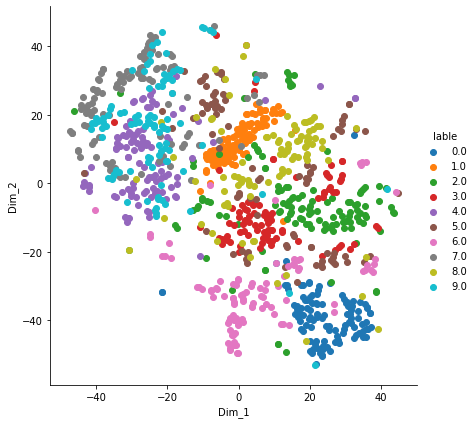

In [25]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sn
standardized_data = StandardScaler().fit_transform(data)
data_1000 = standardized_data[0:1000,:]
model = TSNE(n_components = 2)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,labels_1000)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

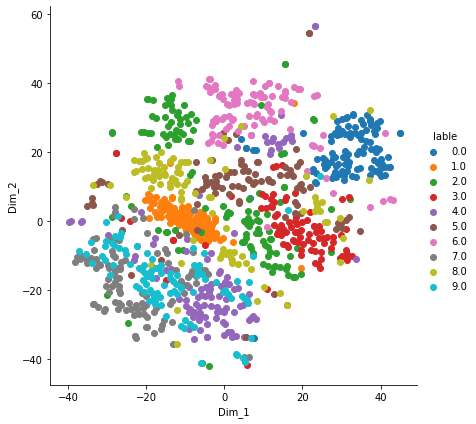

In [28]:
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 50 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,labels_1000)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

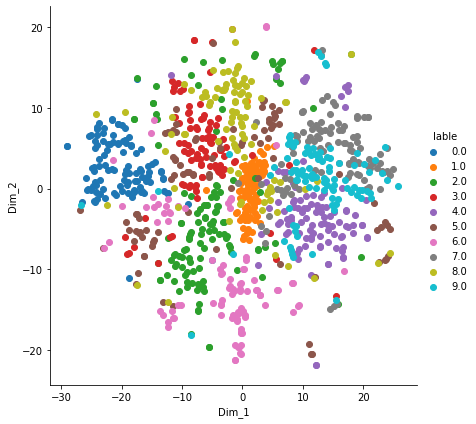

In [29]:
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 100 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)
# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,labels_1000)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lable'))
# ploting the result of tsne
sn.FacetGrid(tane_df,hue='lable',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

In [19]:
from sklearn.manifold import TSNE
import seaborn as sn

# data preprocessing using standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

data_1000 = standardized_data[0:1000,:]
model = TSNE(n_components = 2 , random_state = 0 ,perplexity = 70 , n_iter = 5000)
tane_data = model = model.fit_transform(data_1000)

# creating a data fram which help us in ploting the result
tane_data = np.vstack((tane_data.T,label_1000)).T
tane_df = pd.DataFrame(data=tane_data, columns=('Dim_1','Dim_2','lables'))

# ploting the result of tsne
sn.FacetGrid(tane_df,hue='labels',height = 6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()

KeyError: 'labels'

In [17]:
label_1000 = l.head(1000)
print(label_1000)

0      1
1      0
2      1
3      4
4      0
      ..
995    2
996    5
997    9
998    6
999    4
Name: label, Length: 1000, dtype: int64
